In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
default_data = pd.read_excel('./dataset/dataset.xls', skiprows=1)

In [6]:
default_data.drop('ID', axis=1, inplace=True)

In [7]:
default_data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

#### EDA

In [8]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
# #convert datatypes to integer
# for col in df.select_dtypes(include=[object]).columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce', downcast = 'integer')

In [10]:
# #convert float64 datatype to int64
# df = df.astype({col: 'int64' for col in df.select_dtypes(include = ['float64']).columns})

In [11]:
default_data.rename(columns={'default payment next month': 'Y'}, inplace=True)

In [12]:
default_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
0             0         0         0         0  1  
1          1000      1000         0      2000  1  
2          1000      1000      1000      5000  0  
3          1200      1100      1069      1000  0  
4         10000      9000       689       679  0  
...         ...       ...       ...       ... ..  
29995      5003      3047      5000      1000  0  
29996      8998       129         0         0  0  
29997     22000      4200      2000      3100  1  
29998      1178      1926     52964      1804  1  
29999      1430      1000      1000      1000  1  

[30000 rows x 24 columns]

#### Plots

In [13]:
import matplotlib.font_manager as fm

path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name
plt.rcParams['font.size'] = 12

# set figure size to 14, 6 in rcparams
plt.rcParams['figure.figsize'] = 14, 6
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.facecolor'] = '#f7f6f2'
plt.rcParams['axes.facecolor'] = '#f7f6f2'
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'grey'
plt.rcParams['grid.alpha'] = 0.55
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["#095859"])

# xtick text size
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

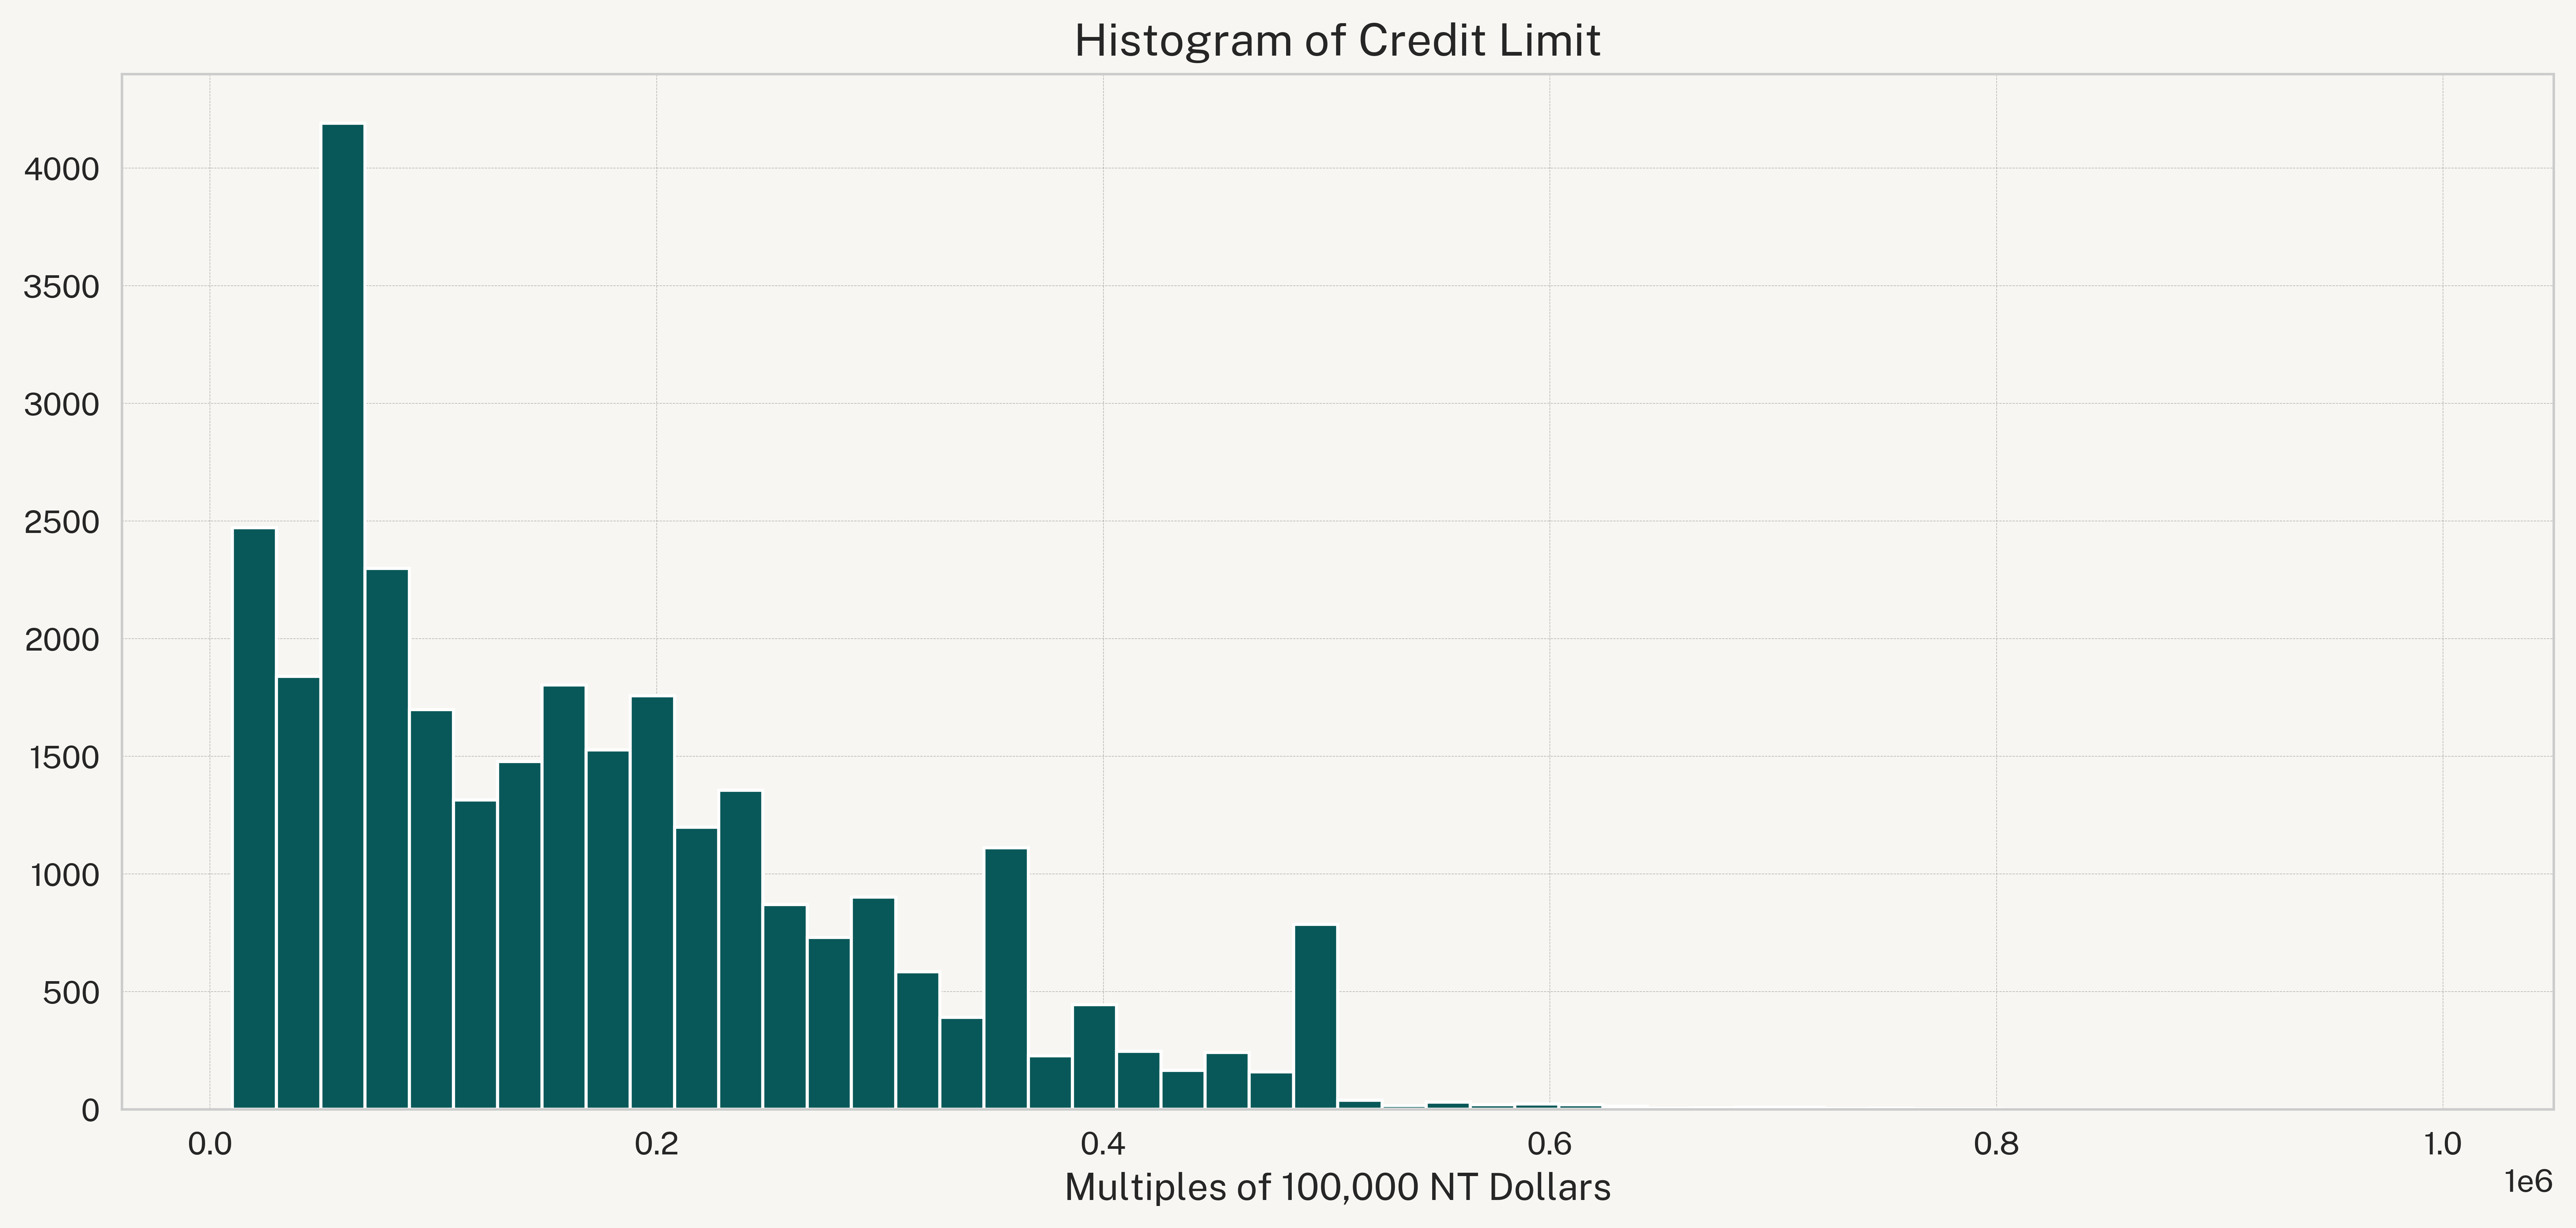

In [14]:
default_data['LIMIT_BAL'].hist(bins=50)
plt.title('Histogram of Credit Limit')
plt.xlabel('Multiples of 100,000 NT Dollars')
plt.show()

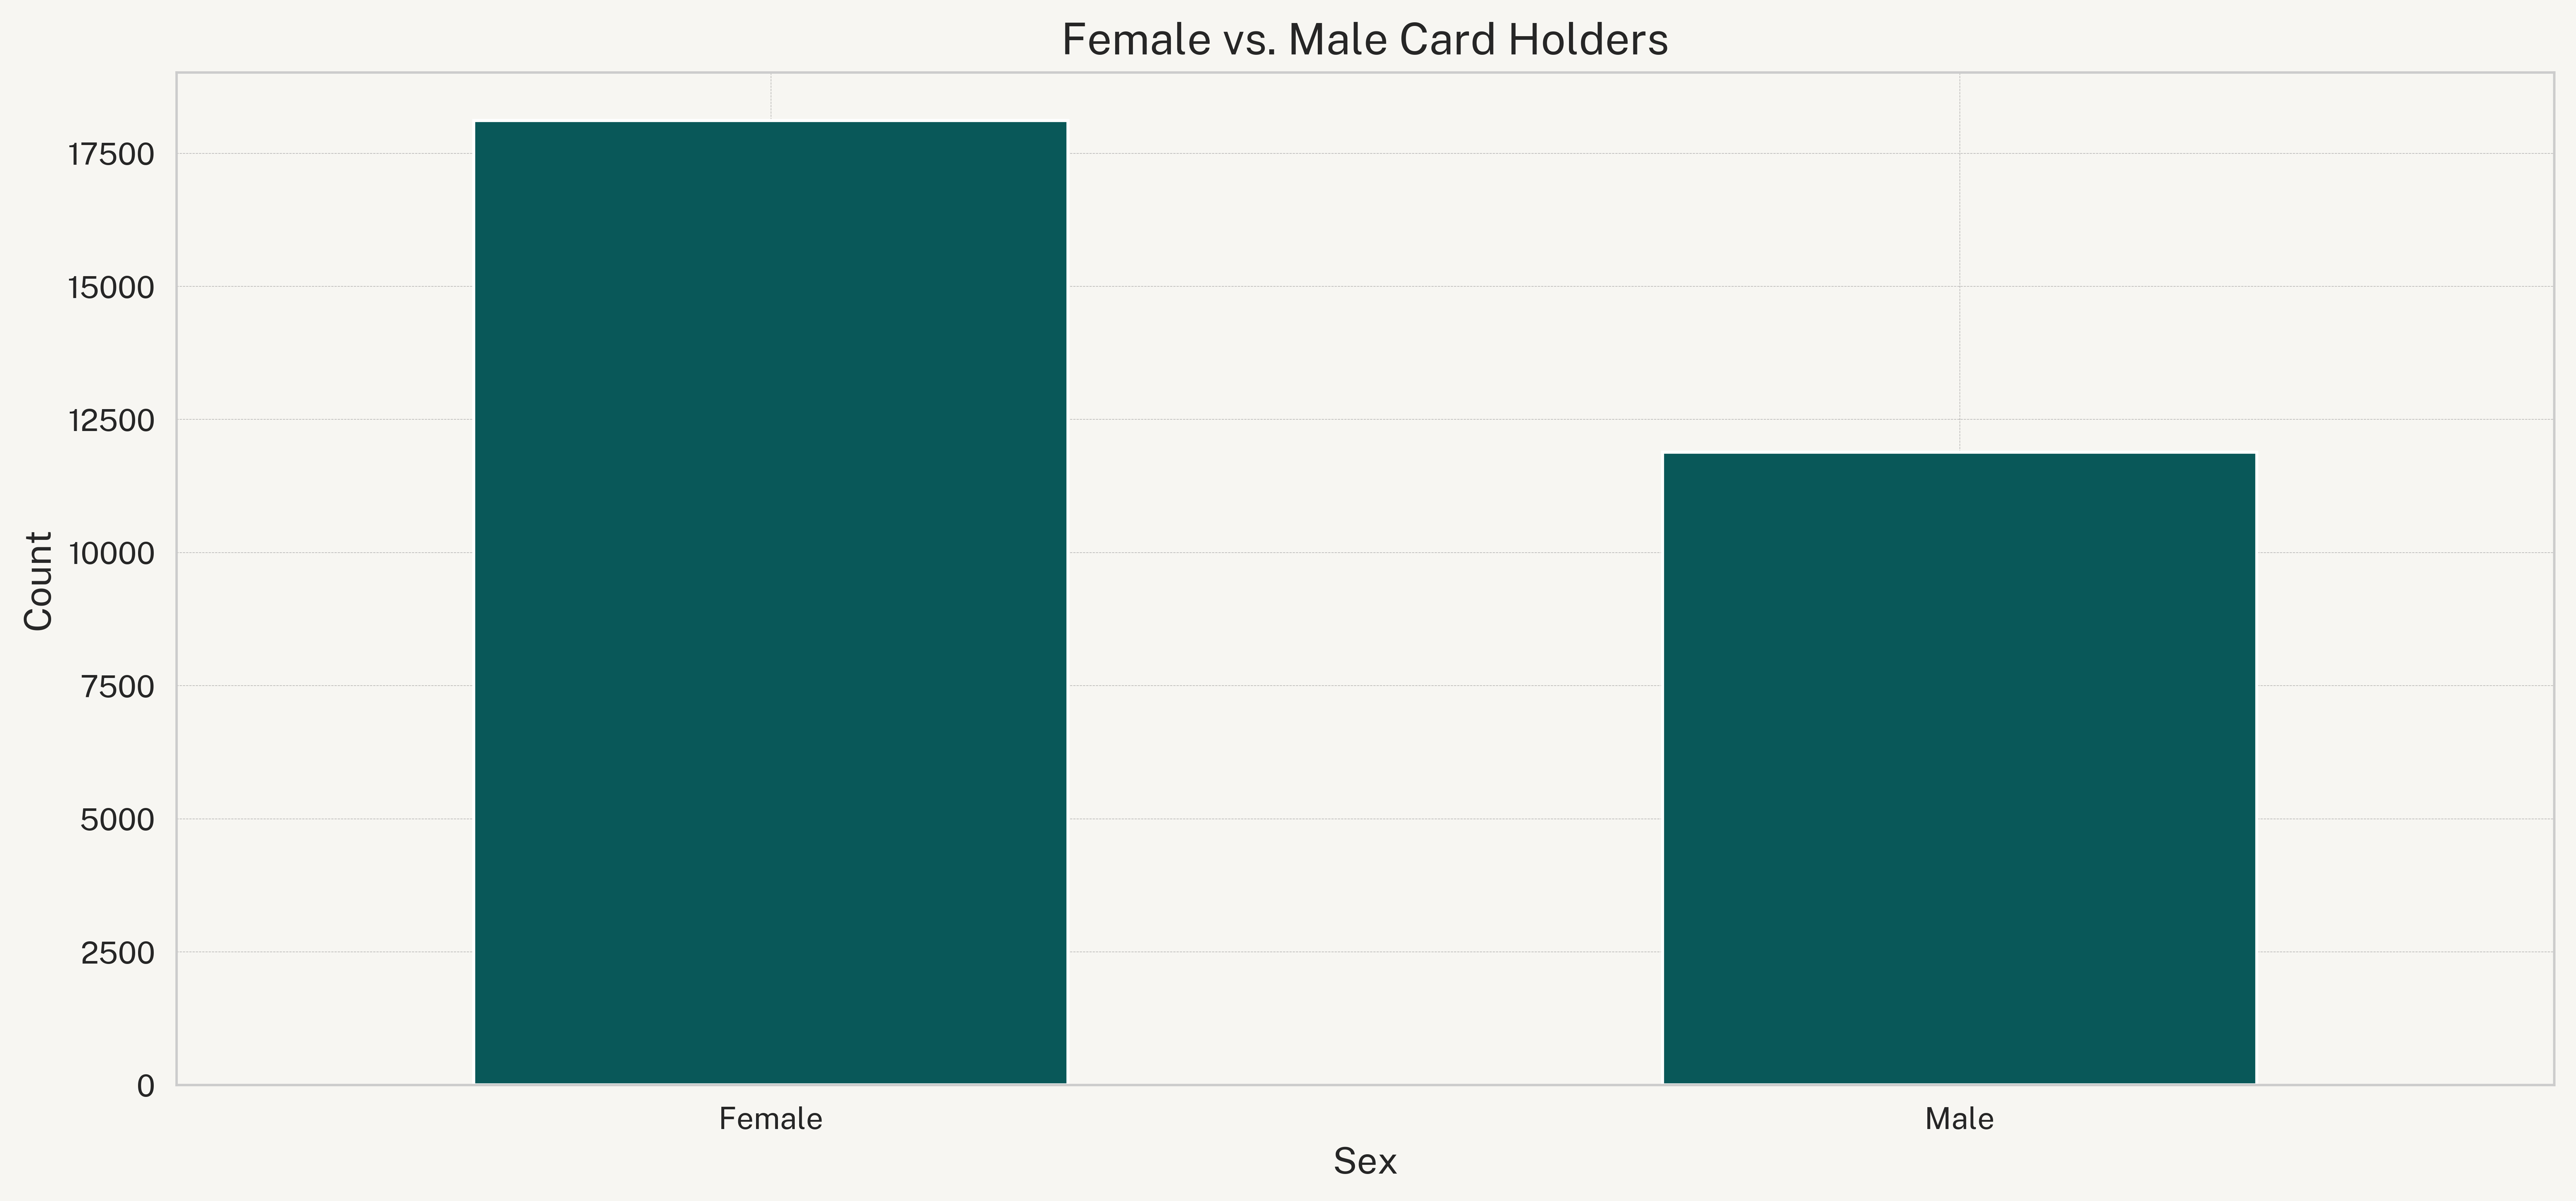

In [15]:
# df['X2'].hist(bins=10)
# plt.xlabel('X2')
# plt.ylabel('Freq')
# plt.title('Sex histogram')
# plt.show()

ax = default_data['SEX'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Male', '2': 'Female'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Sex")
ax.set_ylabel("Count")
ax.set_title("Female vs. Male Card Holders")

plt.show()

In [16]:
default_data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [17]:
default_data['EDUCATION'] = default_data['EDUCATION'].where(default_data['EDUCATION'].isin([1, 2, 3, 4]), 4)

In [18]:
default_data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

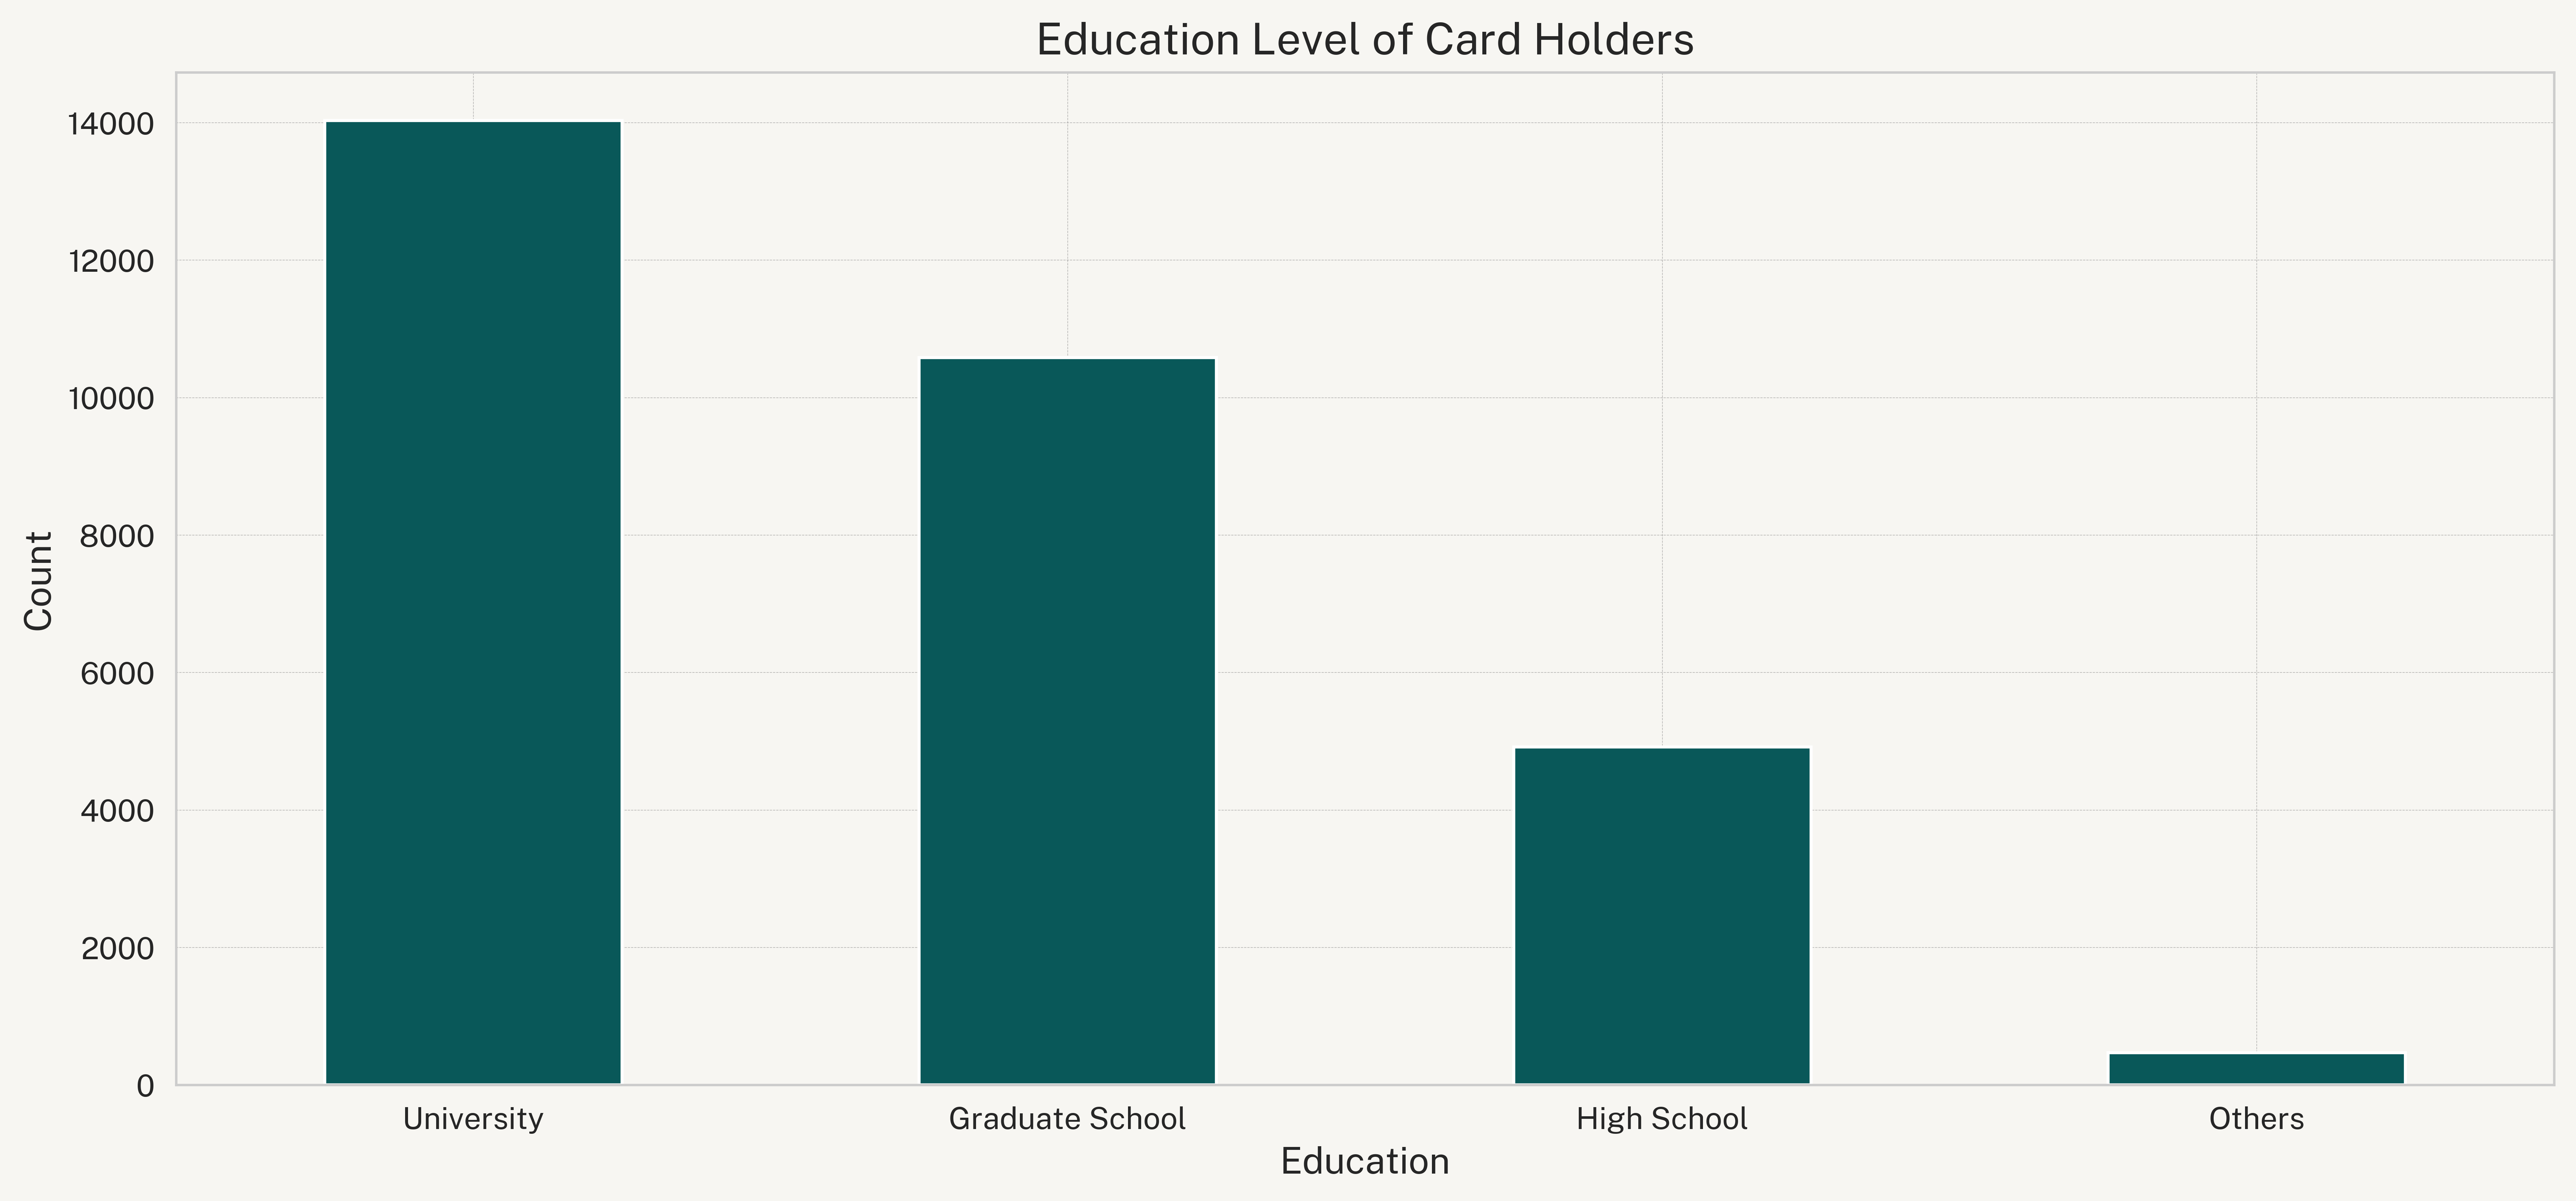

In [19]:
# df['X3'].hist(bins=10)
# plt.xlabel('X3')
# plt.ylabel('Freq')
# plt.title('Education histogram')
# plt.show()

ax = default_data['EDUCATION'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Graduate School', '2': 'University', '3': 'High School', '4': 'Others'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Education")
ax.set_ylabel("Count")
ax.set_title("Education Level of Card Holders")

plt.show()

In [20]:
default_data['MARRIAGE'].value_counts()


MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [21]:
default_data['MARRIAGE'] = default_data['MARRIAGE'].where(default_data['MARRIAGE'].isin([1, 2, 3]), 3)
default_data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

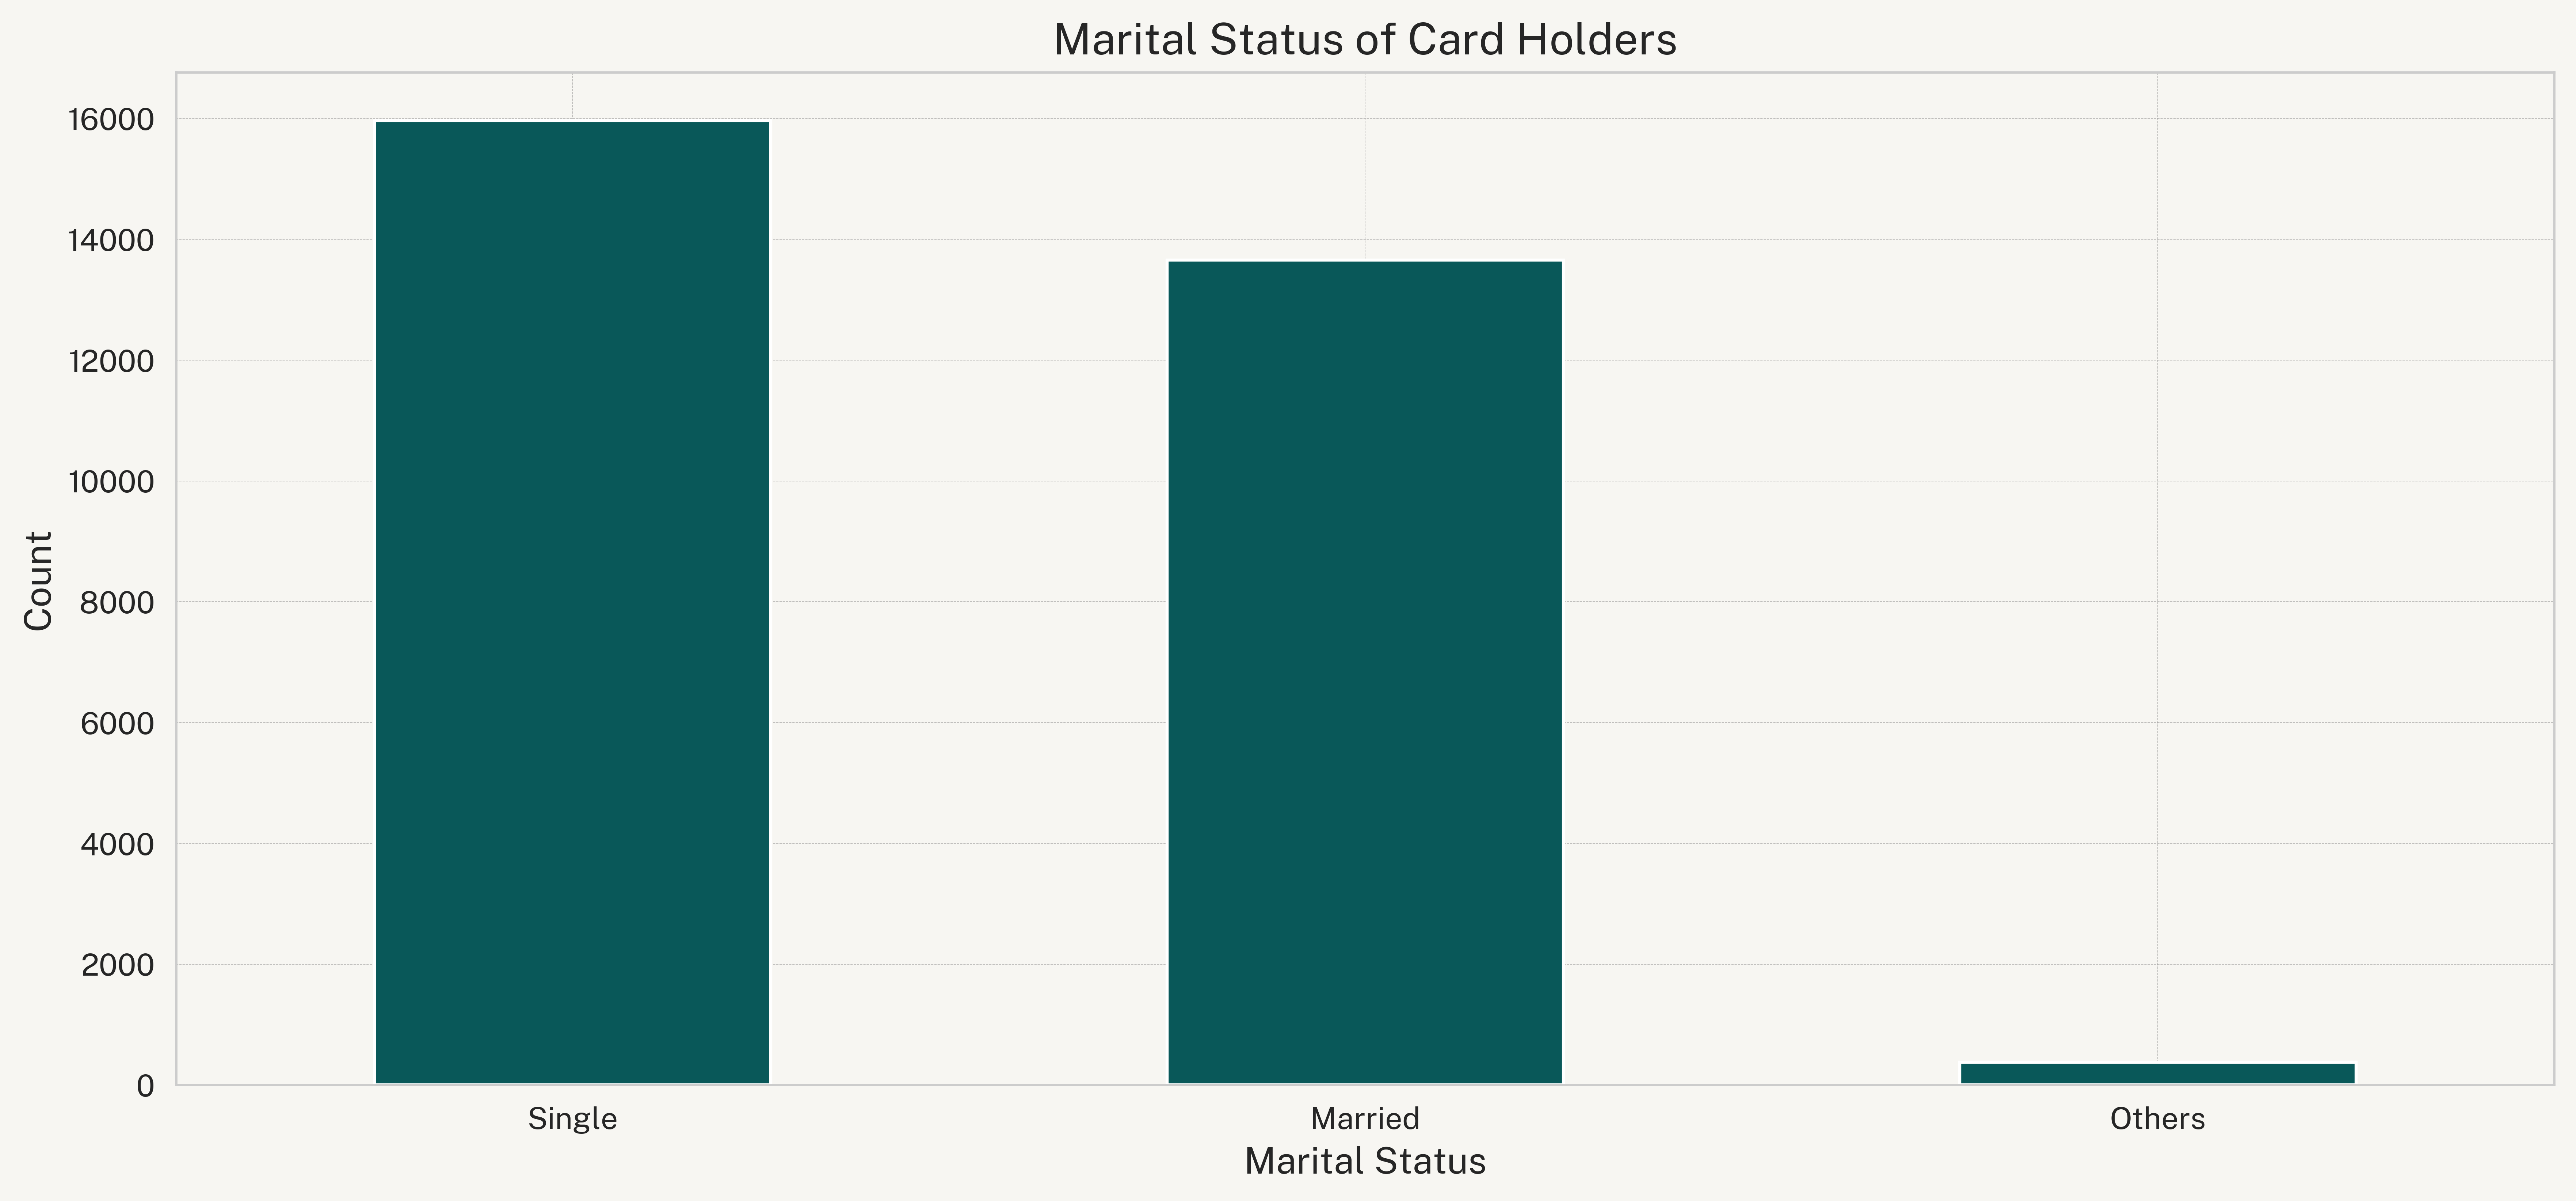

In [22]:
# df['X4'].hist(bins=10)
# plt.xlabel('X4')
# plt.ylabel('Freq')
# plt.title('Marriage histogram')
# plt.show()

ax = default_data['MARRIAGE'].value_counts().plot(kind='bar')
# Define a dictionary to map numerical labels to categorical labels
label_map = {'1': 'Married', '2': 'Single', '3': 'Others'}

# Replace the x-axis labels
ax.set_xticklabels([label_map[x.get_text()] for x in ax.get_xticklabels()], rotation=0)
ax.set_xlabel("Marital Status")
ax.set_ylabel("Count")
ax.set_title("Marital Status of Card Holders")

plt.show()

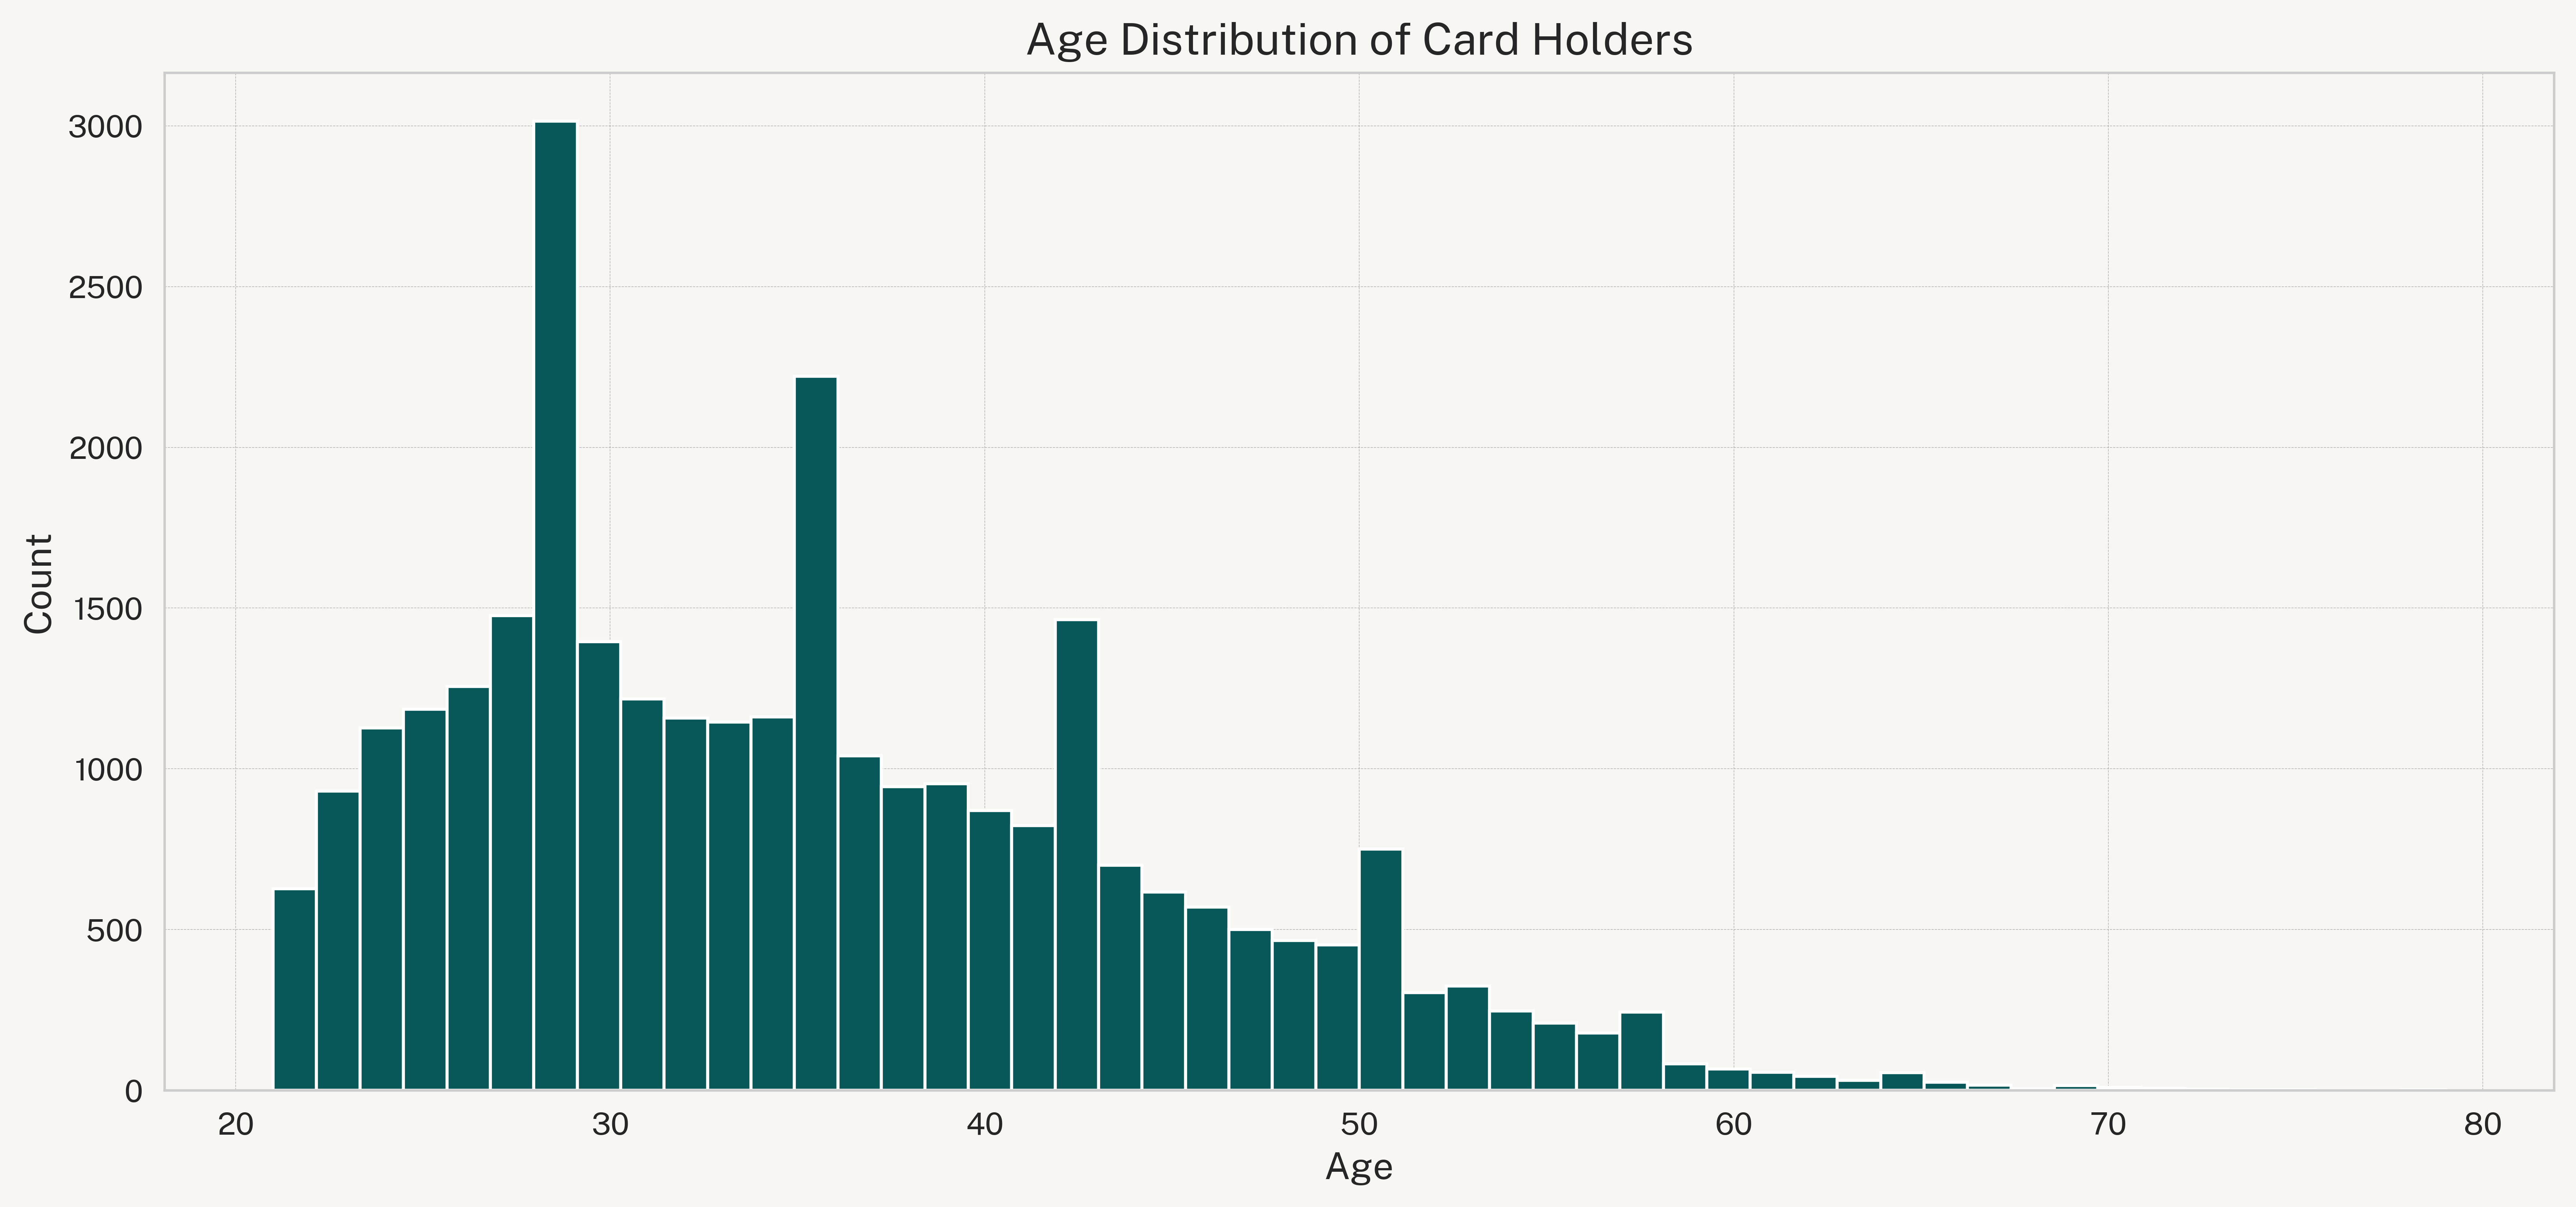

In [23]:
# df['X5'].hist(bins=10)
# plt.xlabel('X5')
# plt.ylabel('Freq')
# plt.title('Age histogram')
# plt.show()

ax = default_data['AGE'].hist(bins=50)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Age Distribution of Card Holders")
plt.show()

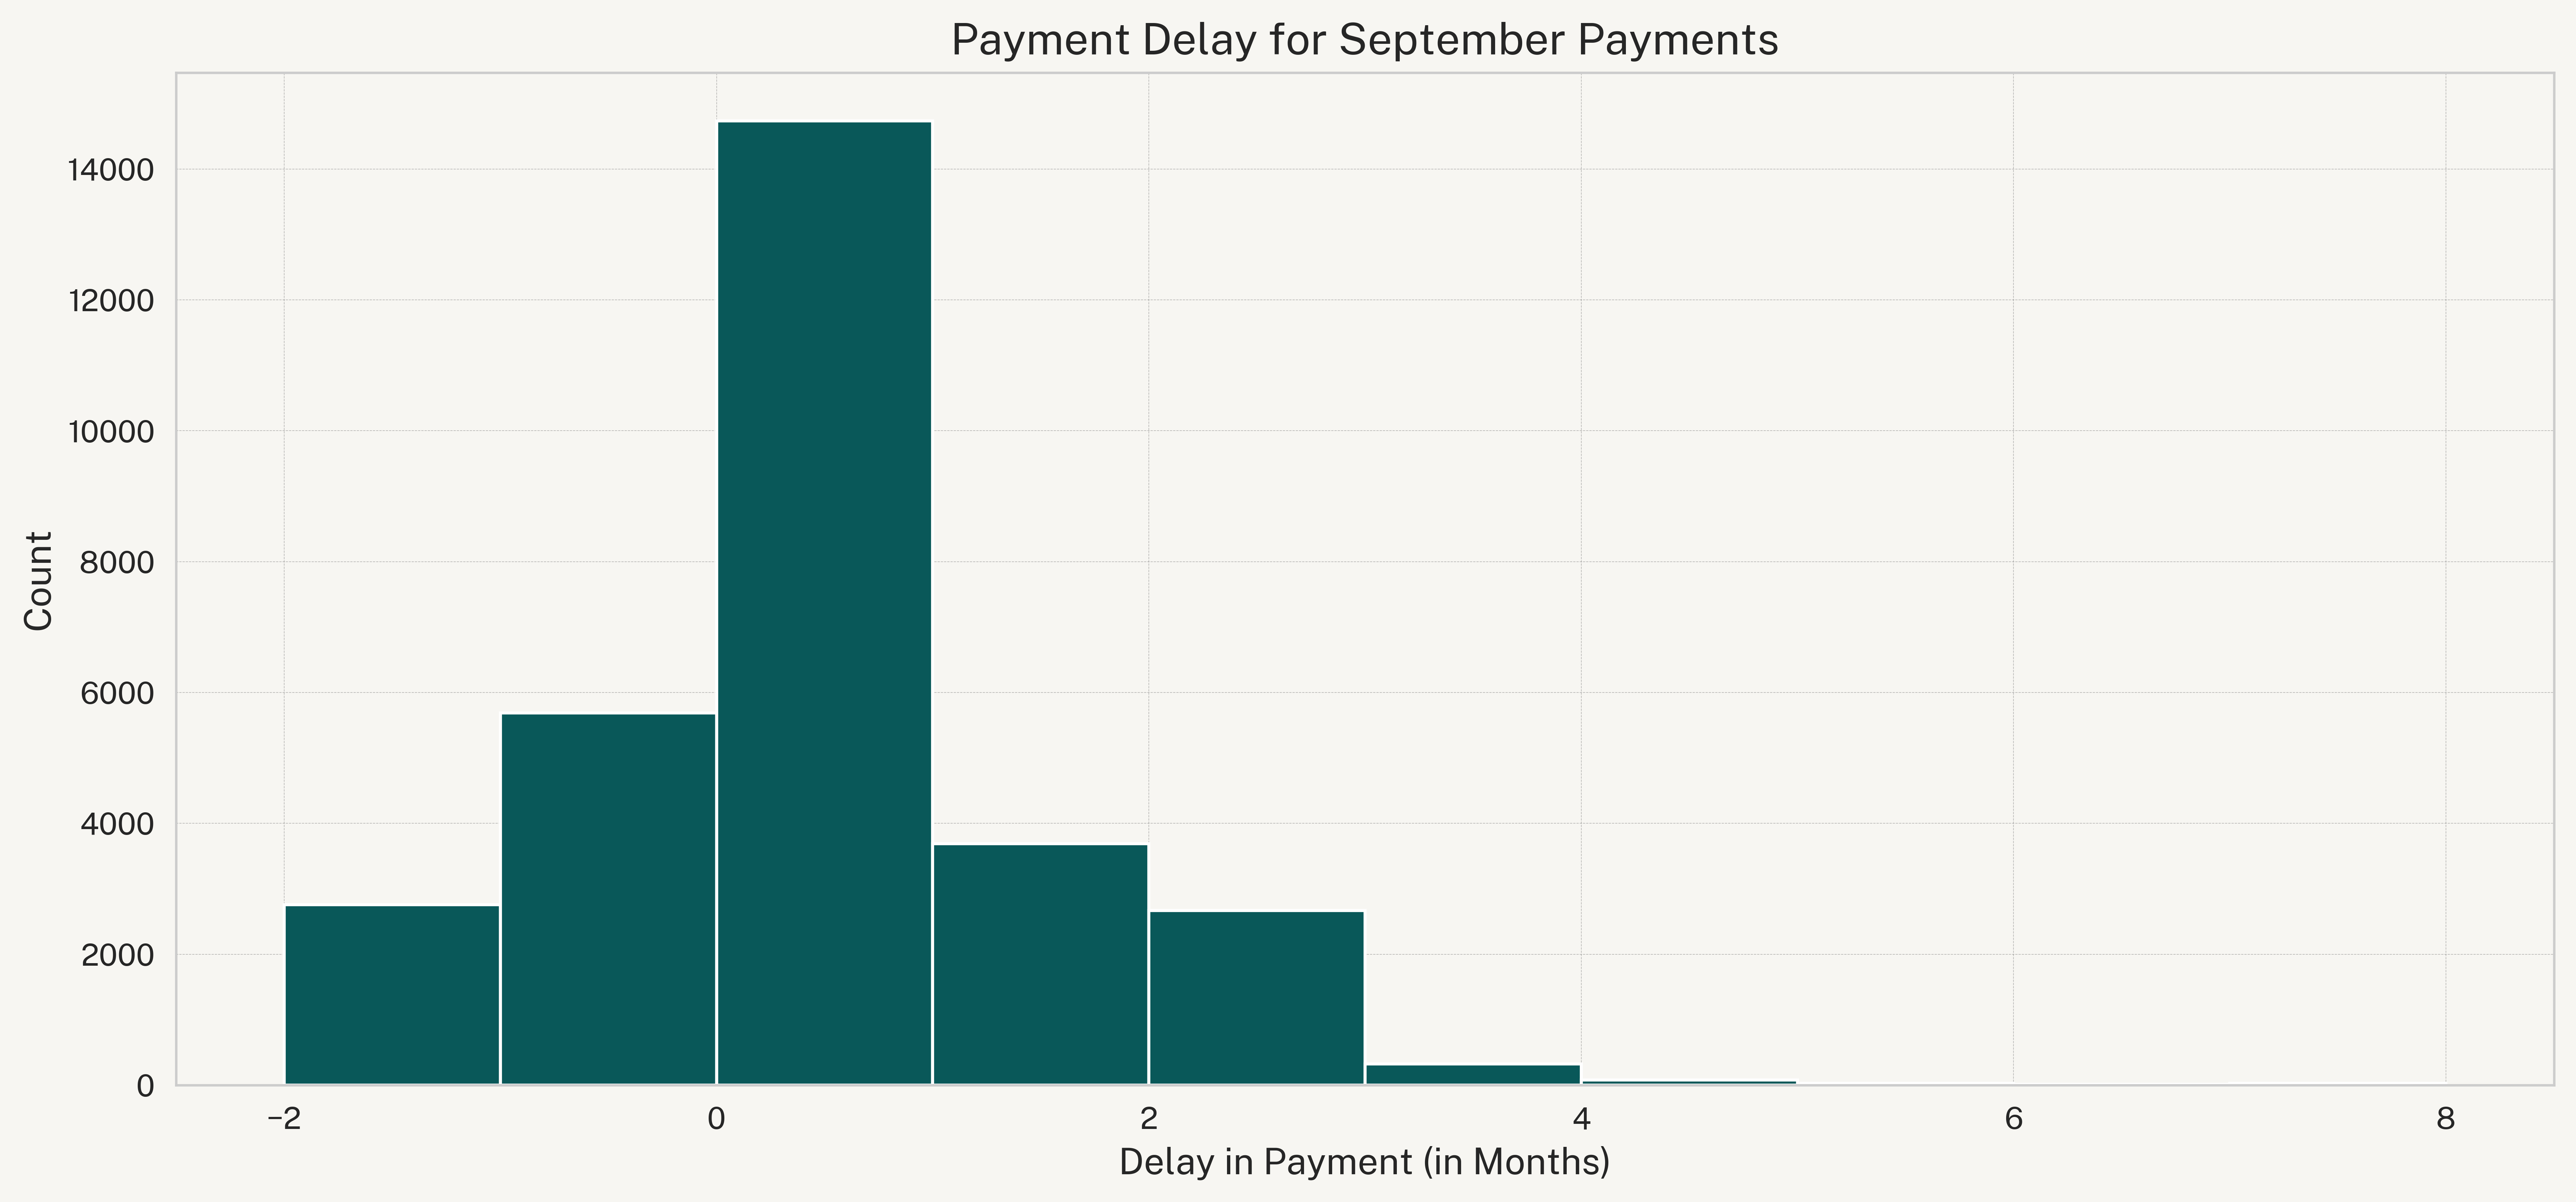

In [24]:
# df['X6'].hist(bins=10)
# plt.xlabel('X6')
# plt.ylabel('Freq')
# plt.title('Pay 0 histogram')
# plt.show()

ax = default_data['PAY_0'].hist(bins=10)
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for September Payments")

plt.show()

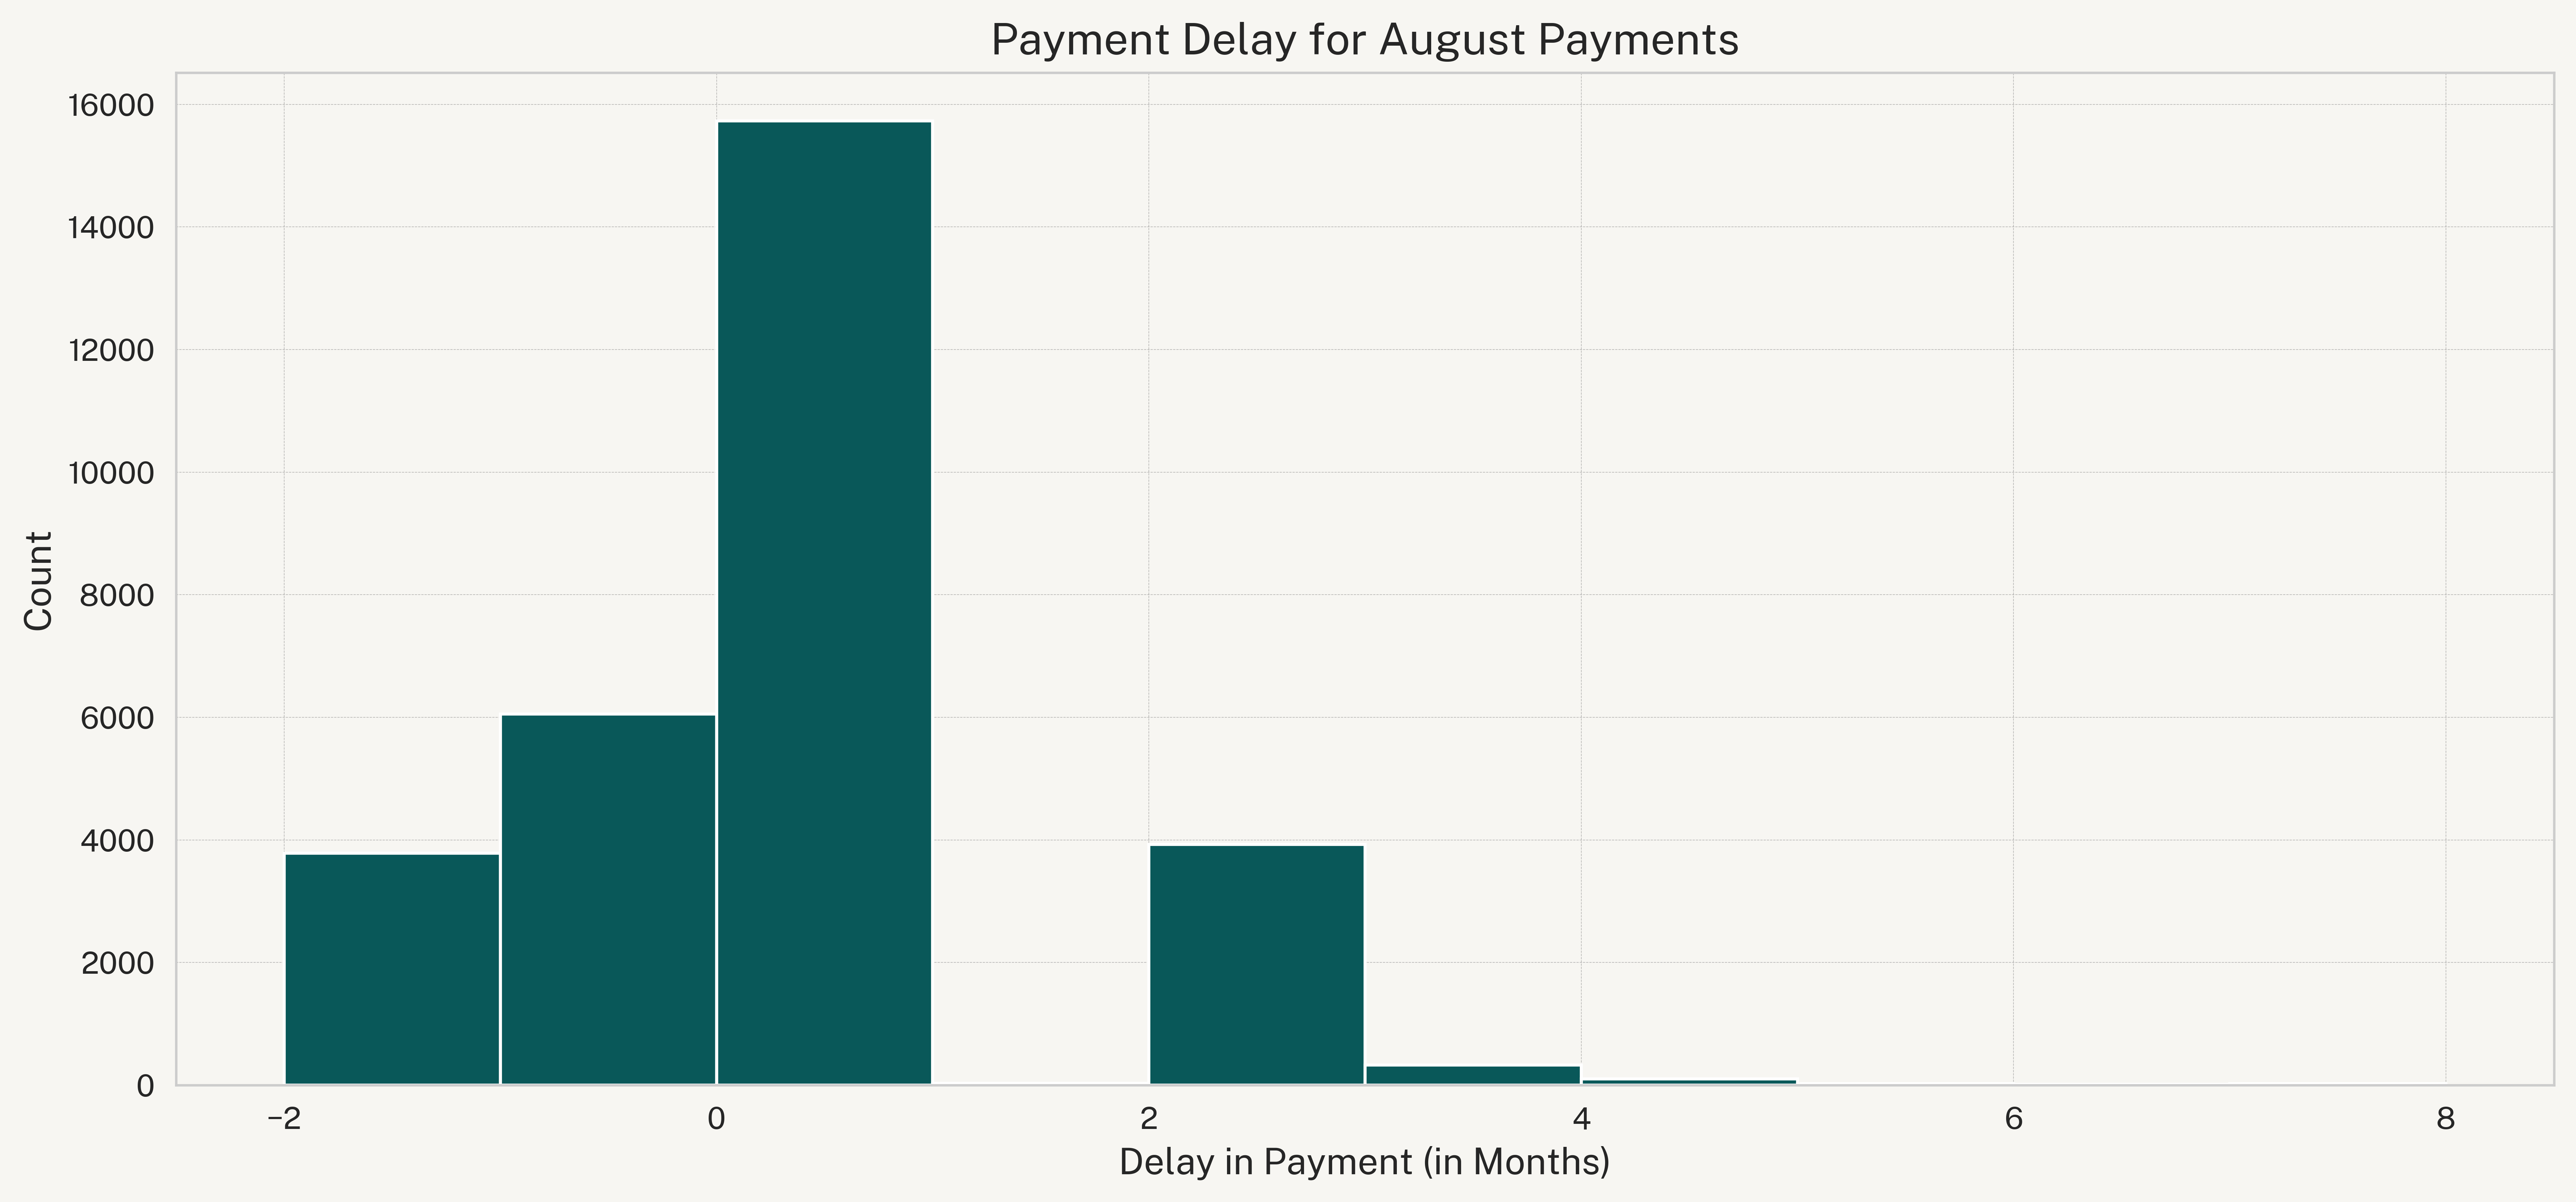

In [25]:
# df['X7'].hist(bins=10)
# plt.xlabel('X7')
# plt.ylabel('Freq')
# plt.title('Pay_1 histogram')
# plt.show()

ax = default_data['PAY_2'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for August Payments")

plt.show()

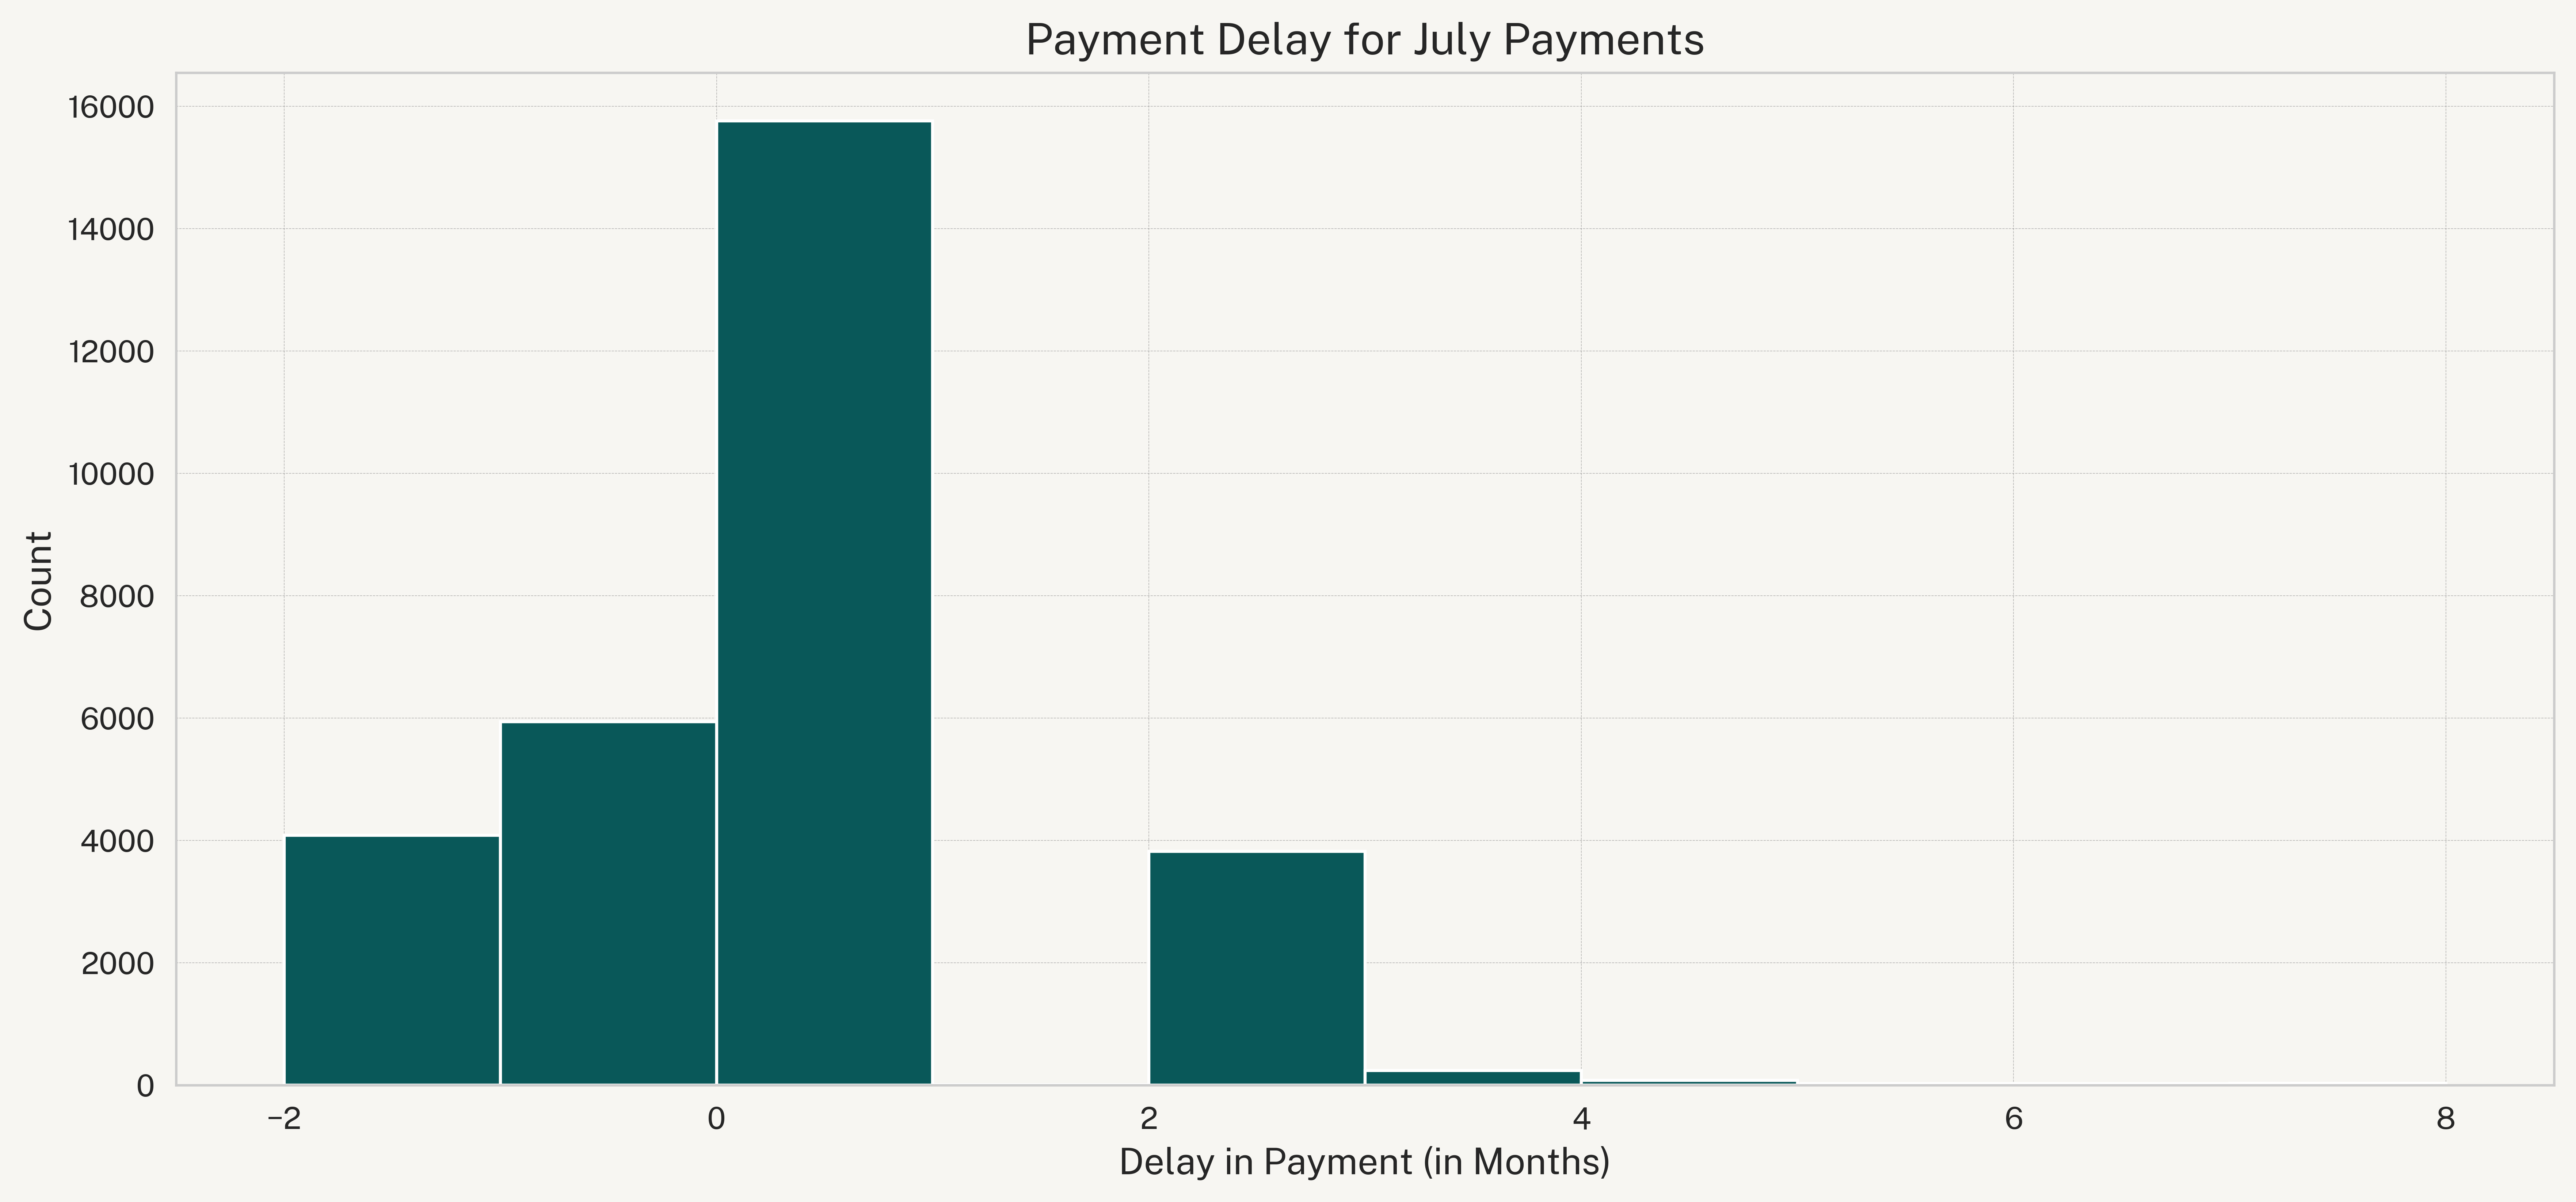

In [26]:
# df['X8'].hist(bins=10)
# plt.xlabel('X8')
# plt.ylabel('Freq')
# plt.title('Pay_ 2 histogram')
# plt.show()

ax = default_data['PAY_3'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for July Payments")

plt.show()

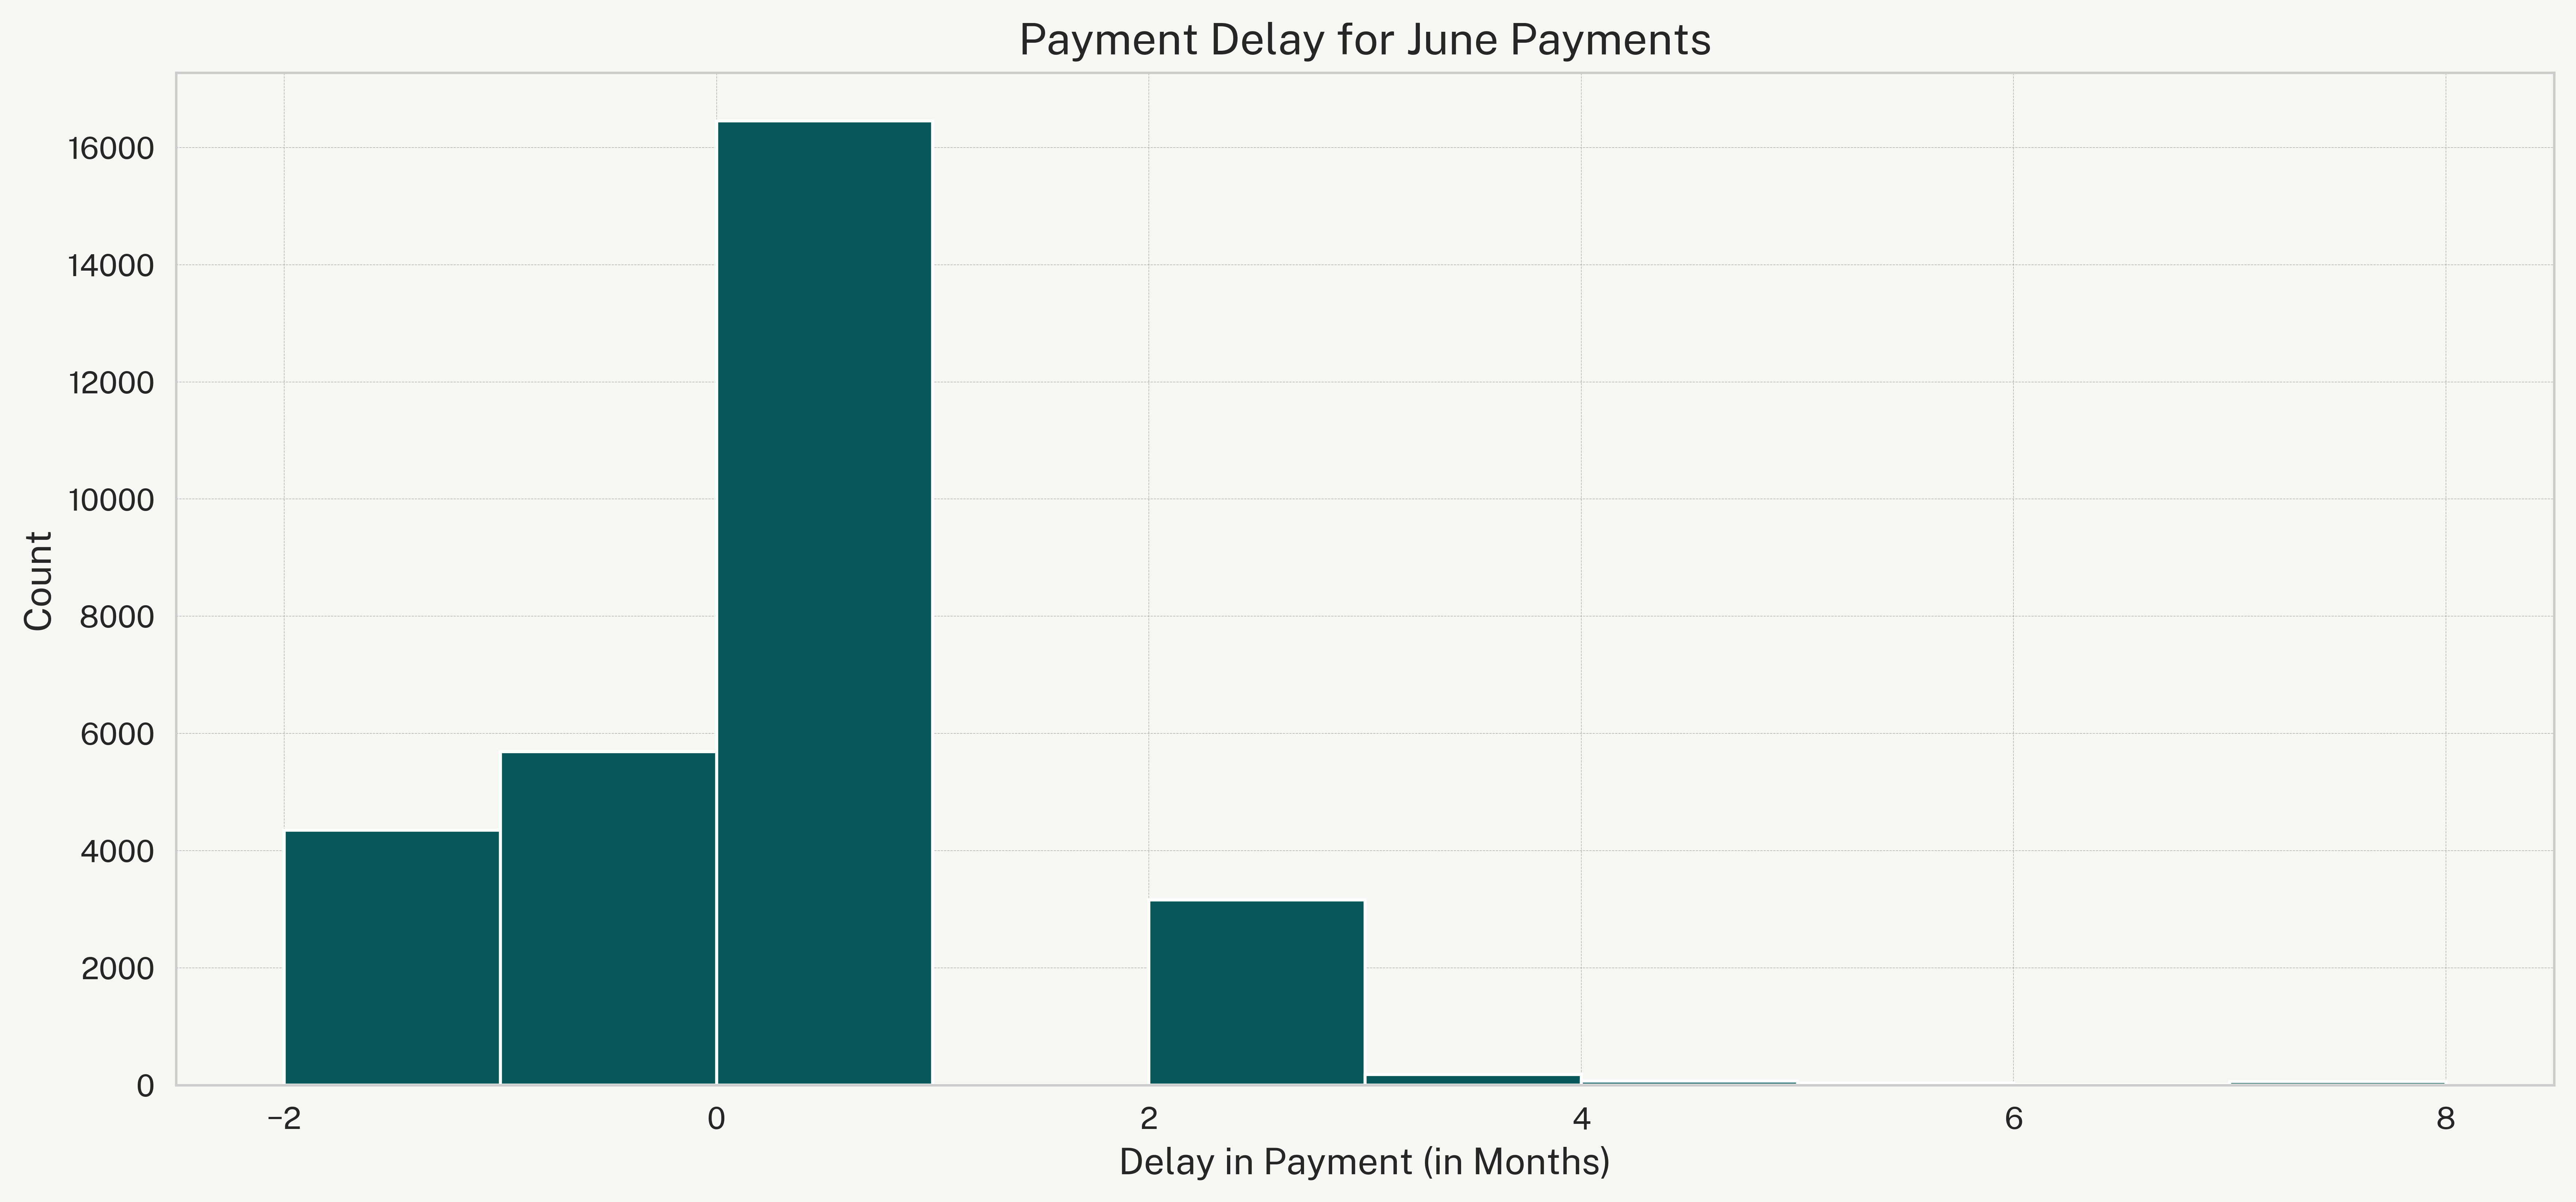

In [27]:
# df['X9'].hist(bins=10)
# plt.xlabel('X9')
# plt.ylabel('Freq')
# plt.title('Pay_3 histogram')
# plt.show()

ax = default_data['PAY_4'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for June Payments")

plt.show()

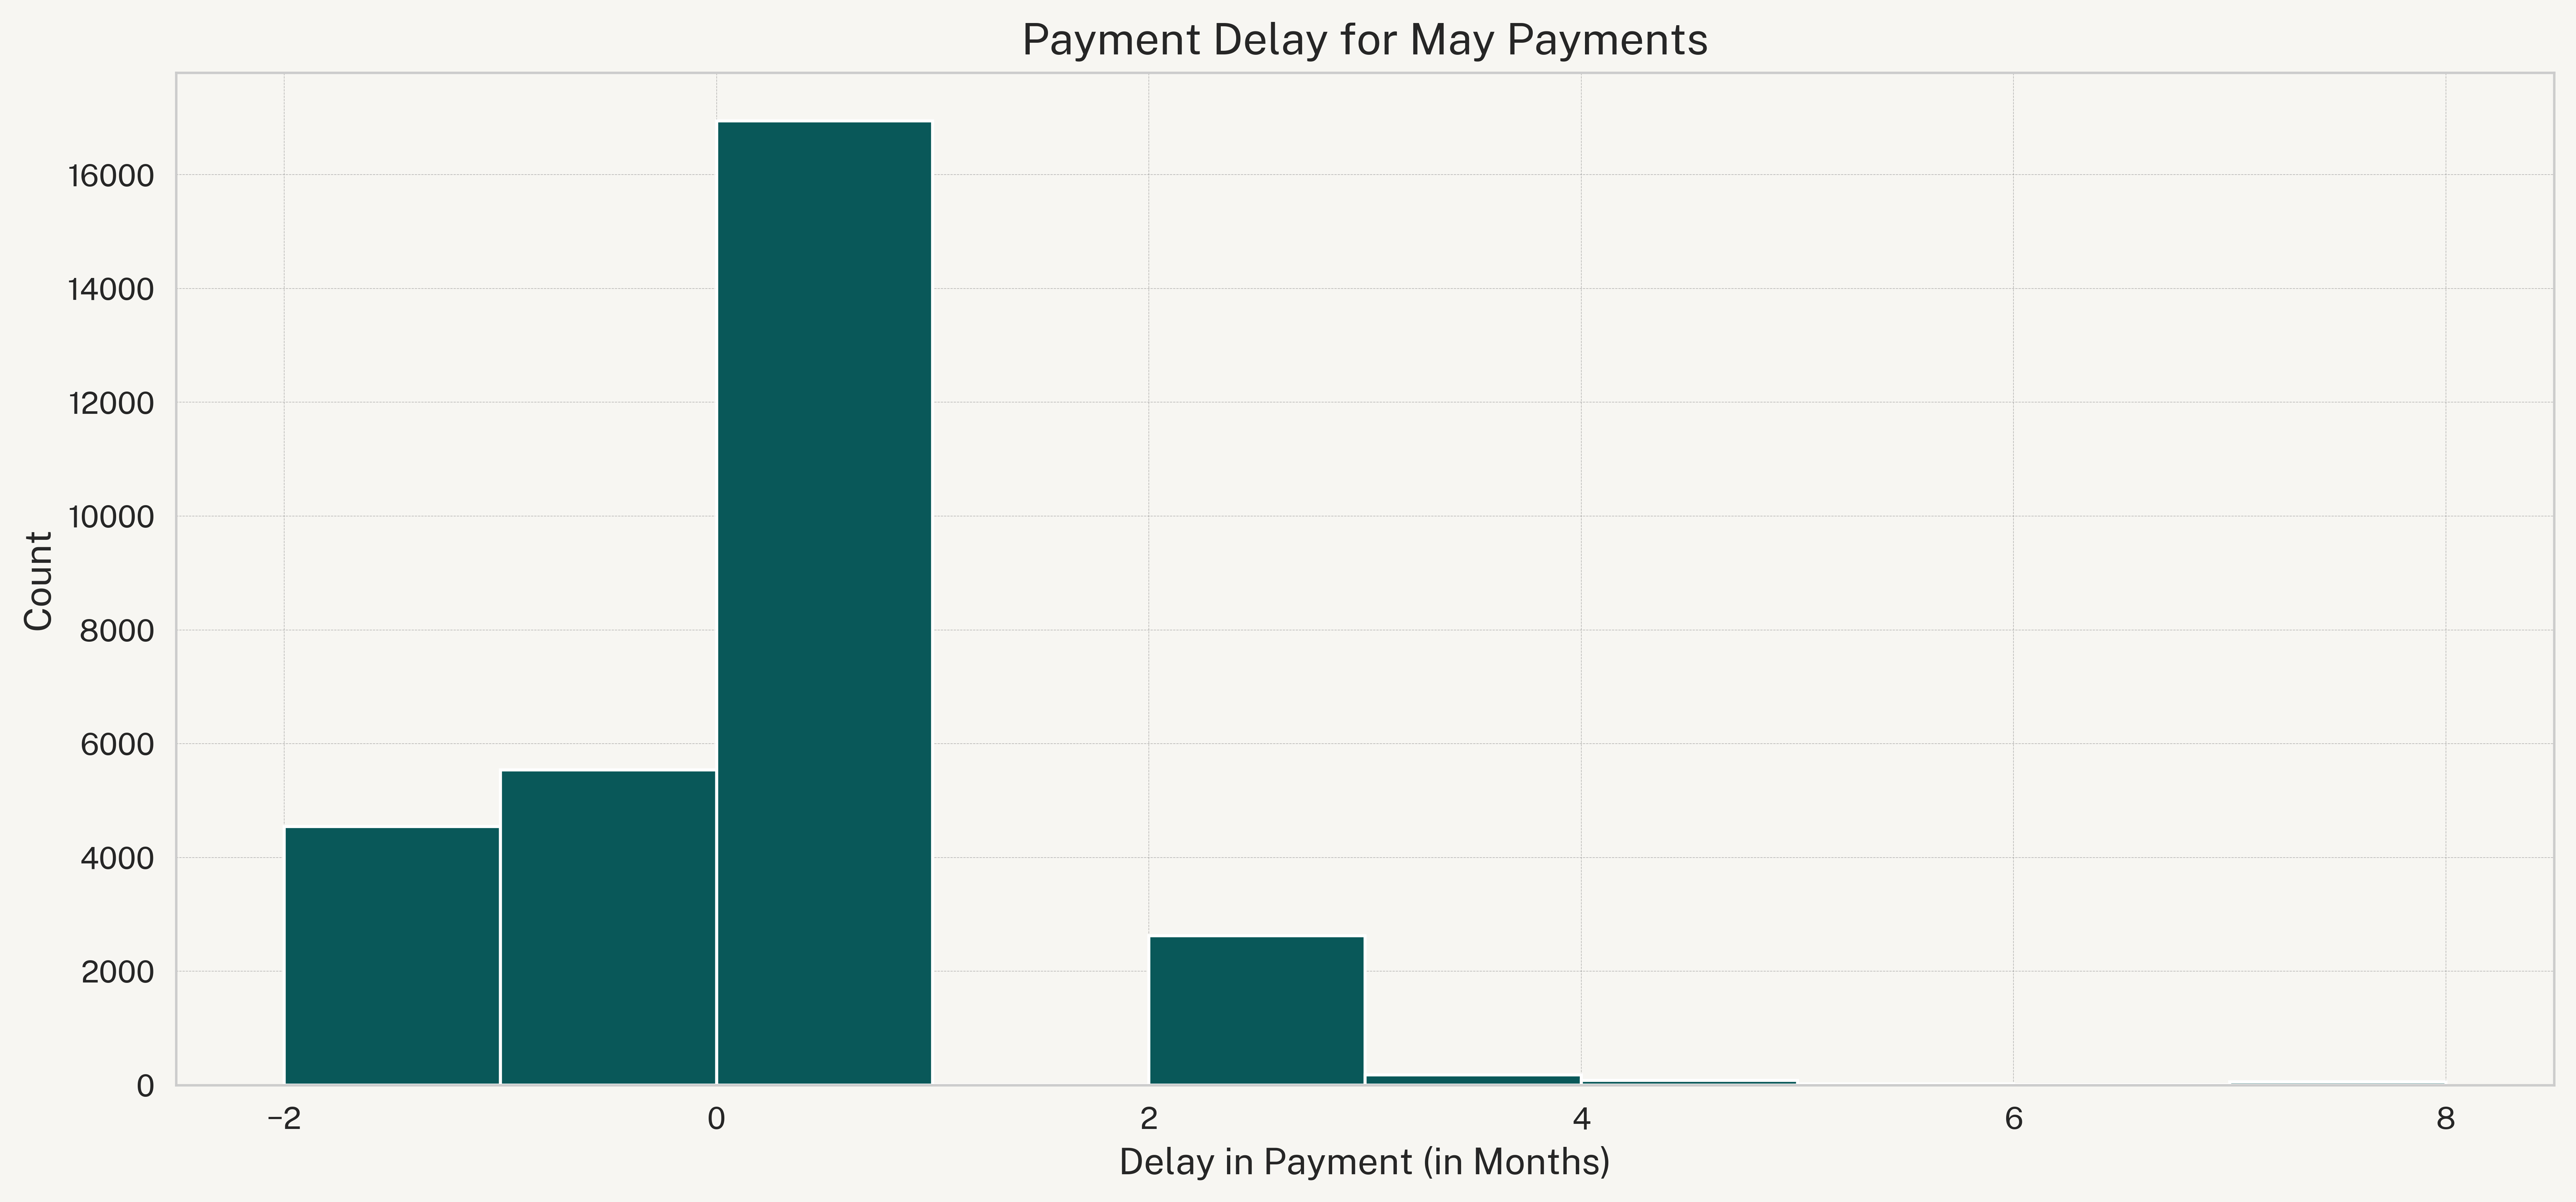

In [28]:
# df['X10'].hist(bins=10)
# plt.xlabel('X10')
# plt.ylabel('Freq')
# plt.title('Pay_4 histogram')
# plt.show()

ax = default_data['PAY_5'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for May Payments")

plt.show()

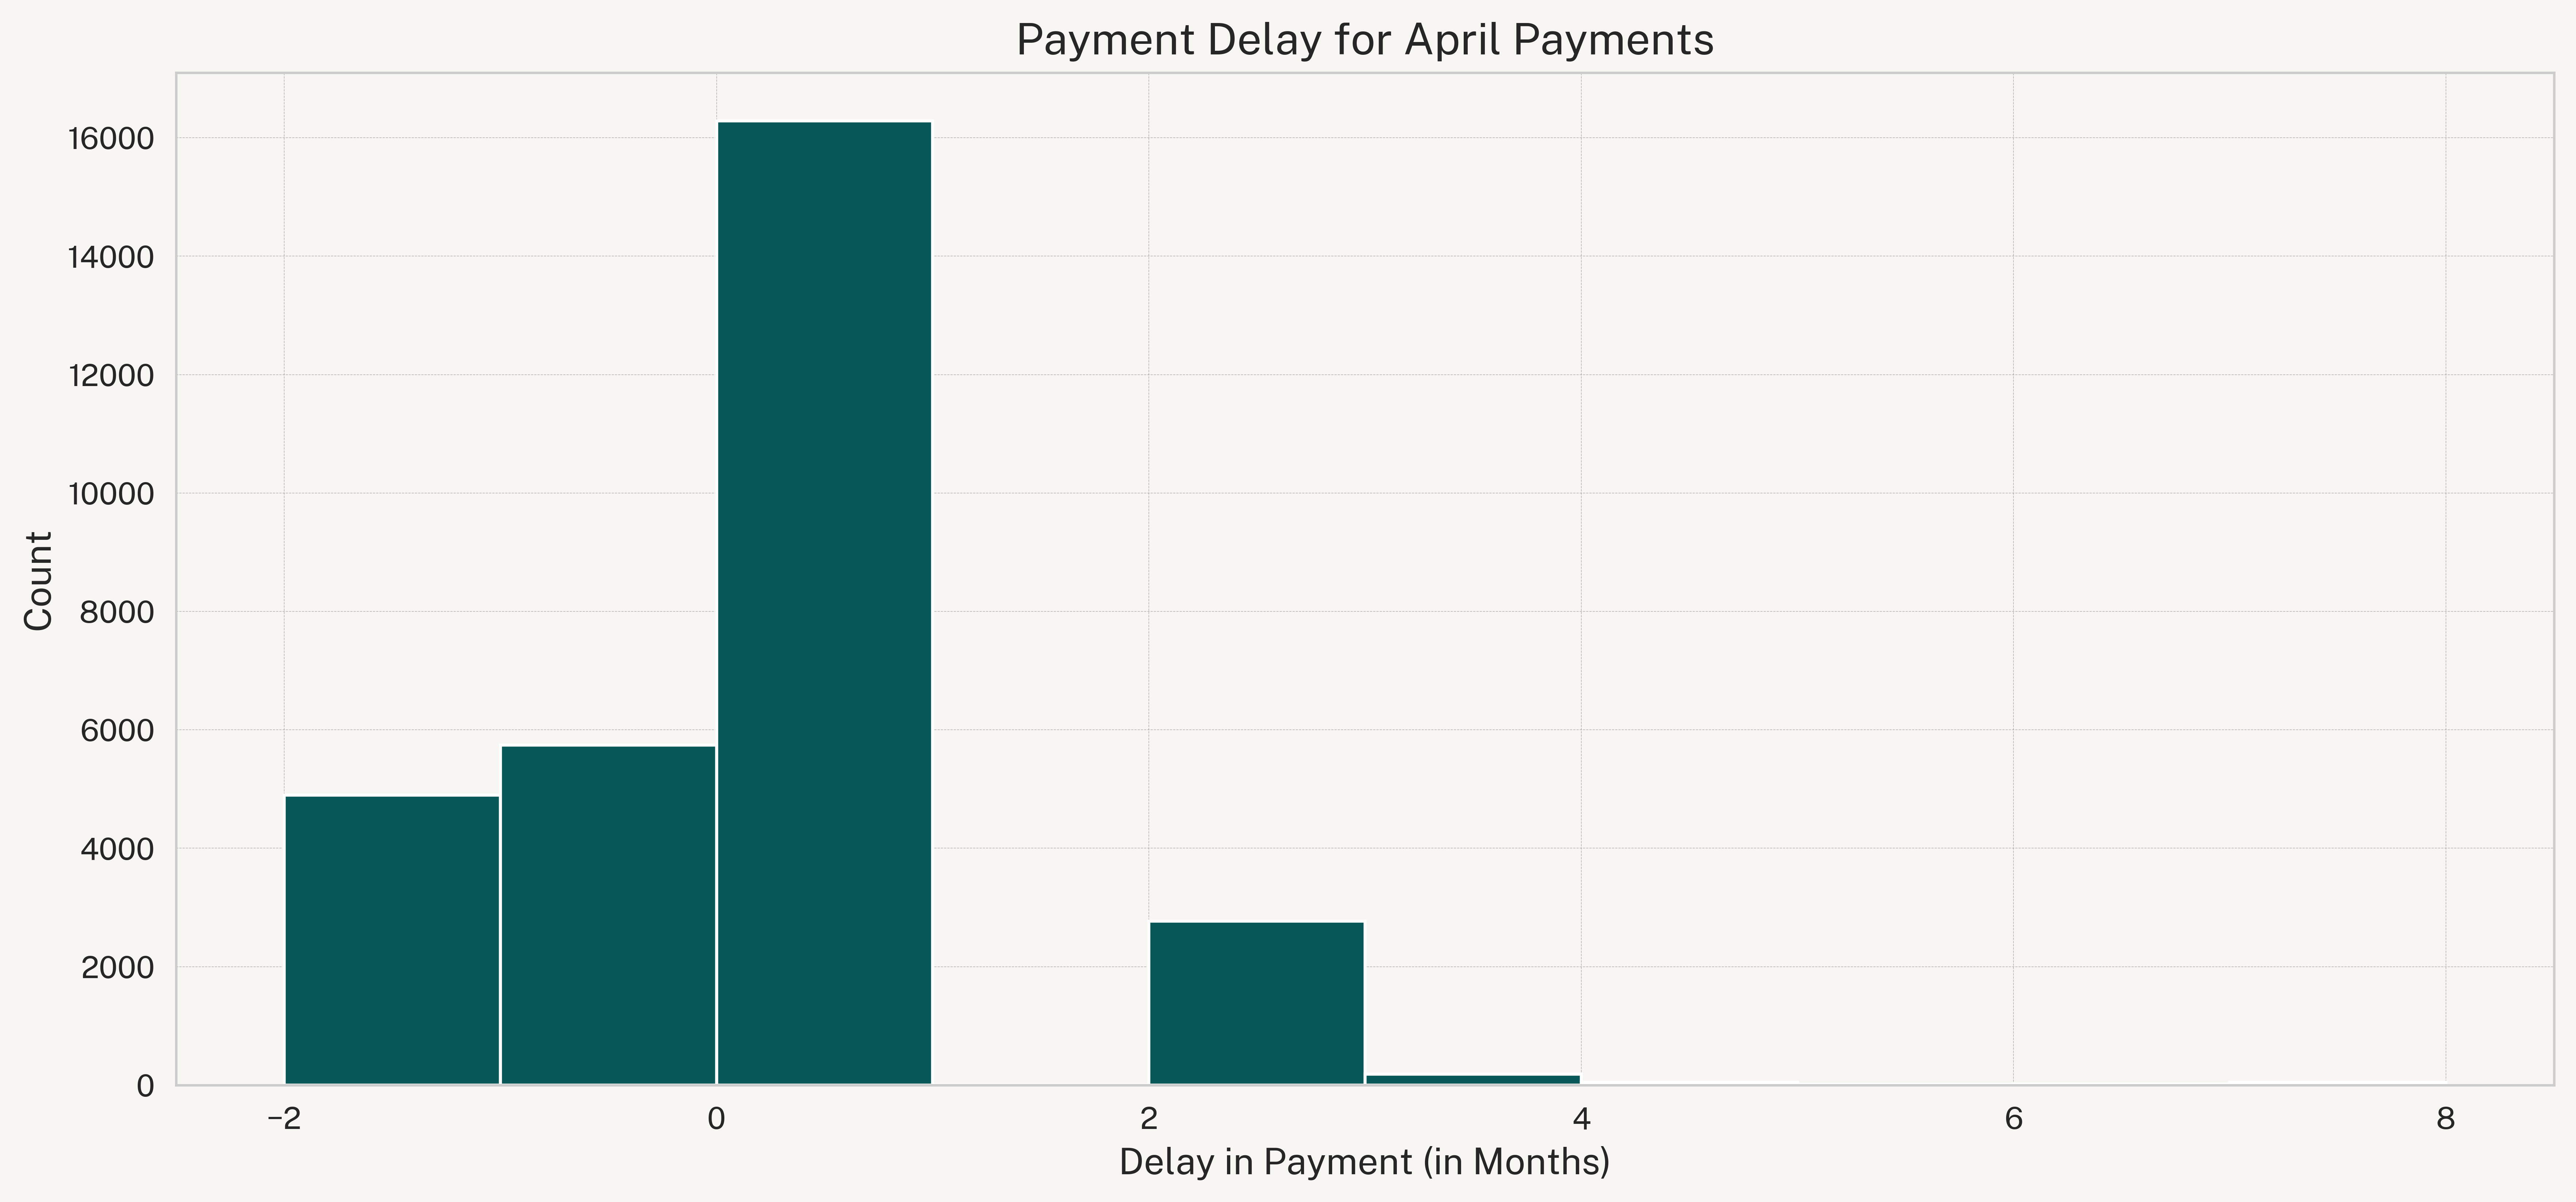

In [29]:
# df['X11'].hist(bins=10)
# plt.xlabel('X11')
# plt.ylabel('Freq')
# plt.title('Pay_6 histogram')
# plt.show()

ax = default_data['PAY_6'].hist()
ax.set_xlabel("Delay in Payment (in Months)")
ax.set_ylabel("Count")
ax.set_title("Payment Delay for April Payments")

plt.show()

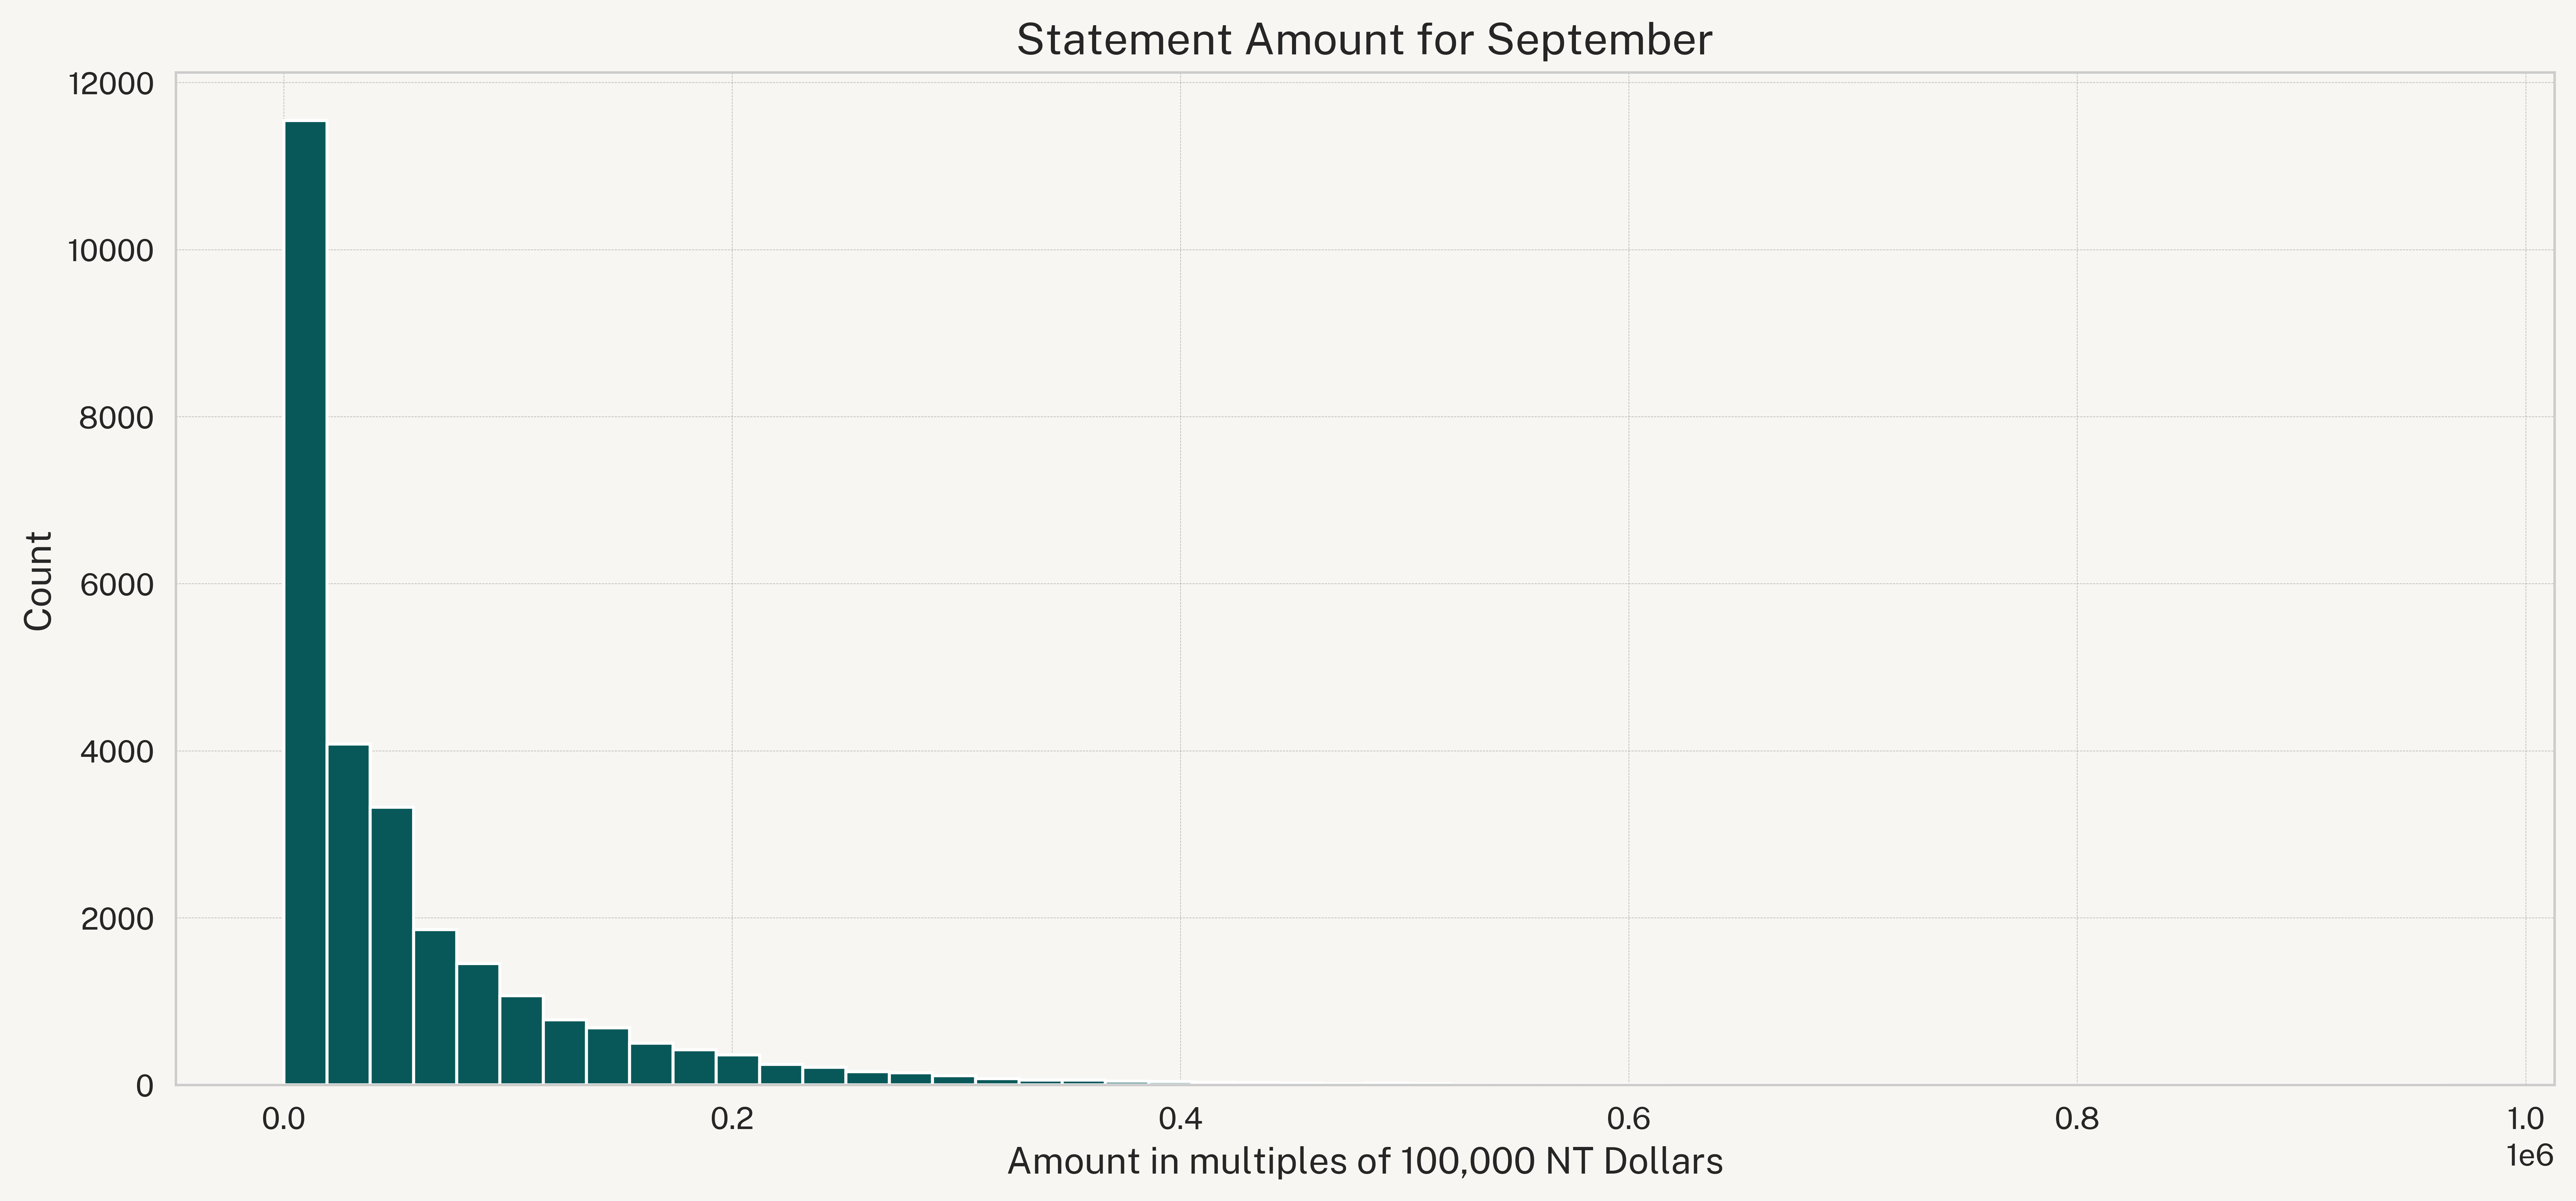

In [30]:
# df['X12'].hist(bins=10)
# plt.xlabel('X12')
# plt.ylabel('Freq')
# plt.title('Bill Amount histogram')
# plt.show()

ax = default_data.loc[default_data['BILL_AMT1'] > 0, 'BILL_AMT1'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for September")

plt.show()

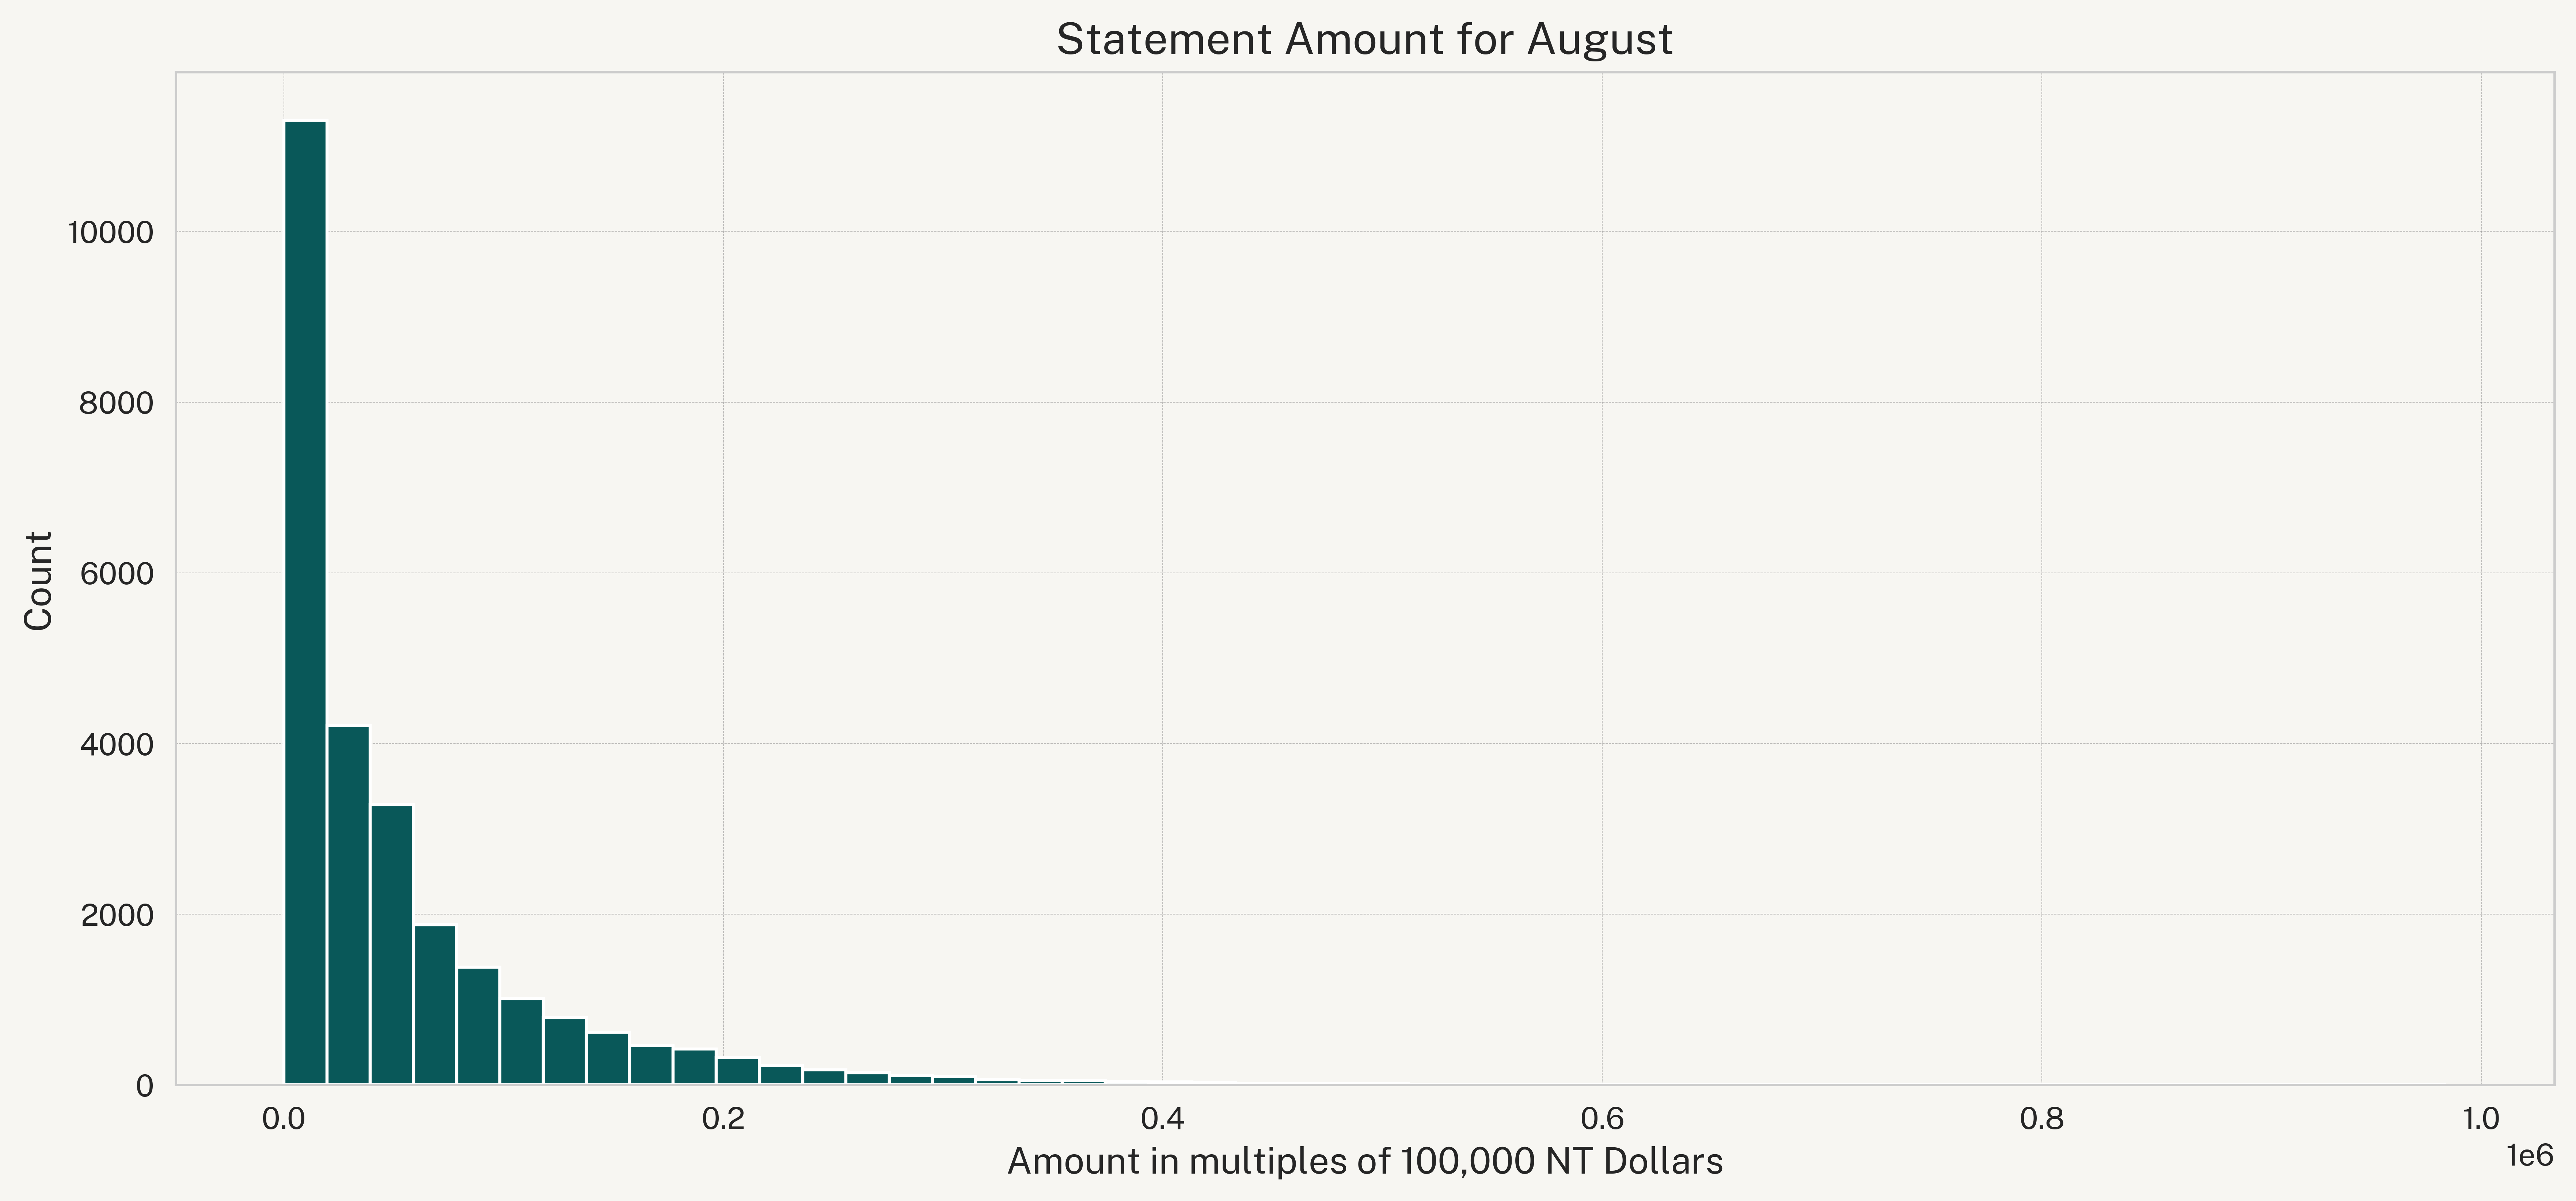

In [31]:
# df['X13'].hist(bins=10)
# plt.xlabel('X13')
# plt.ylabel('Freq')
# plt.title('Bill Amount 2 histogram')
# plt.show()

ax = default_data.loc[default_data['BILL_AMT2'] > 0, 'BILL_AMT2'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for August")

plt.show()

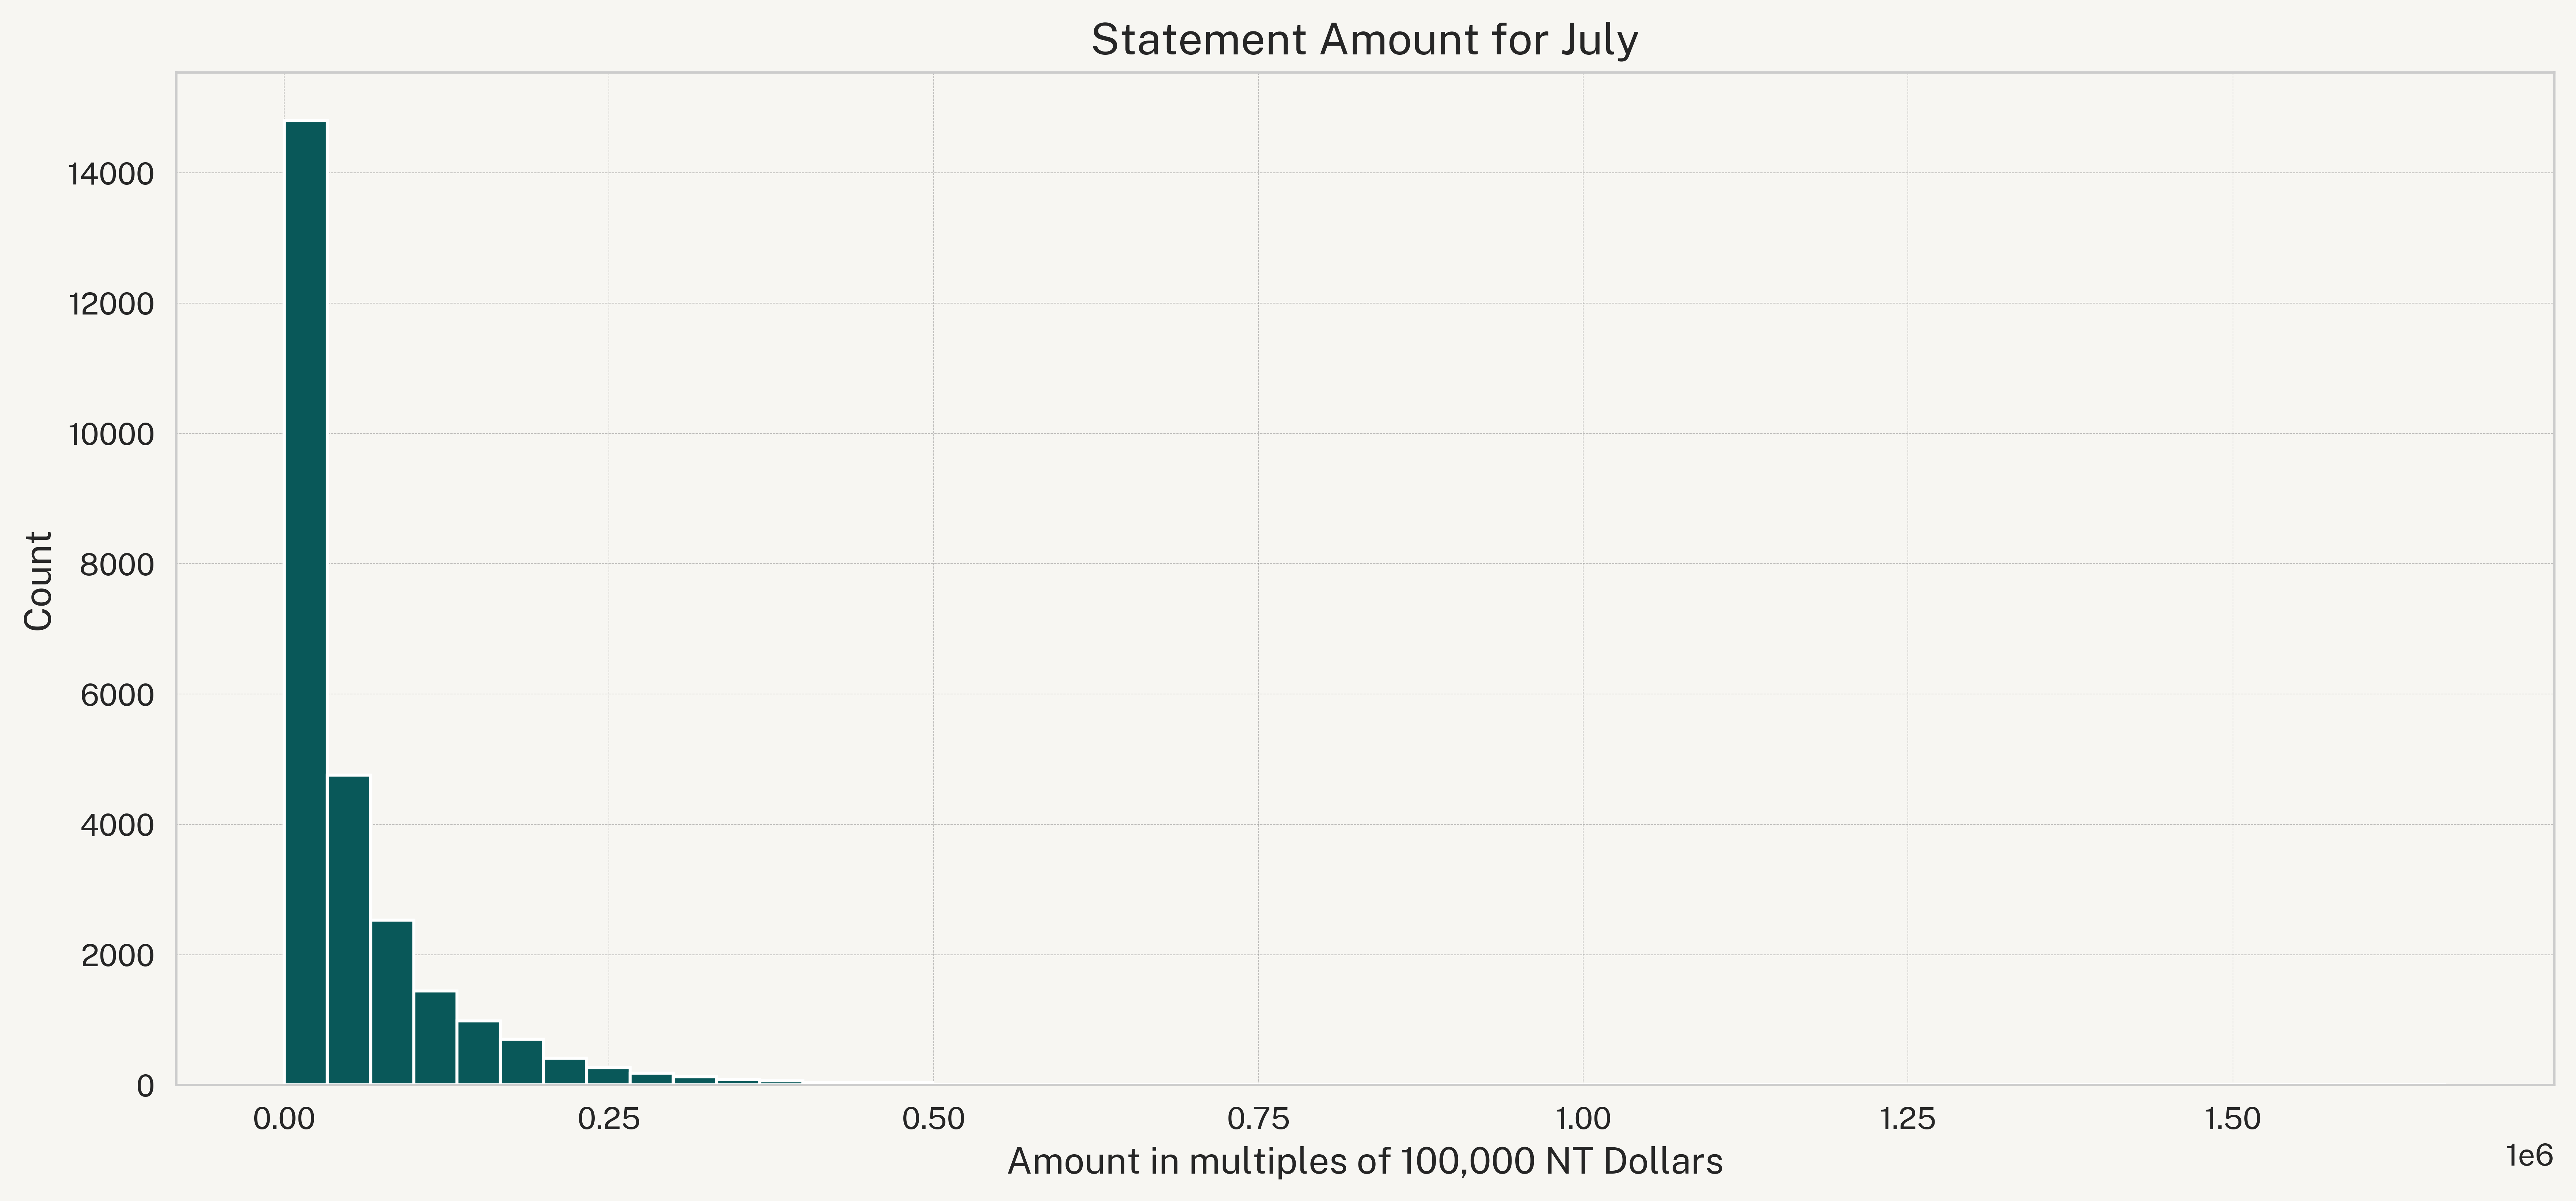

In [32]:
# df['X14'].hist(bins=10)
# plt.xlabel('X14')
# plt.ylabel('Freq')
# plt.title('Bill Amount 3 histogram')

ax = default_data.loc[default_data['BILL_AMT3'] > 0, 'BILL_AMT3'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for July")

plt.show()

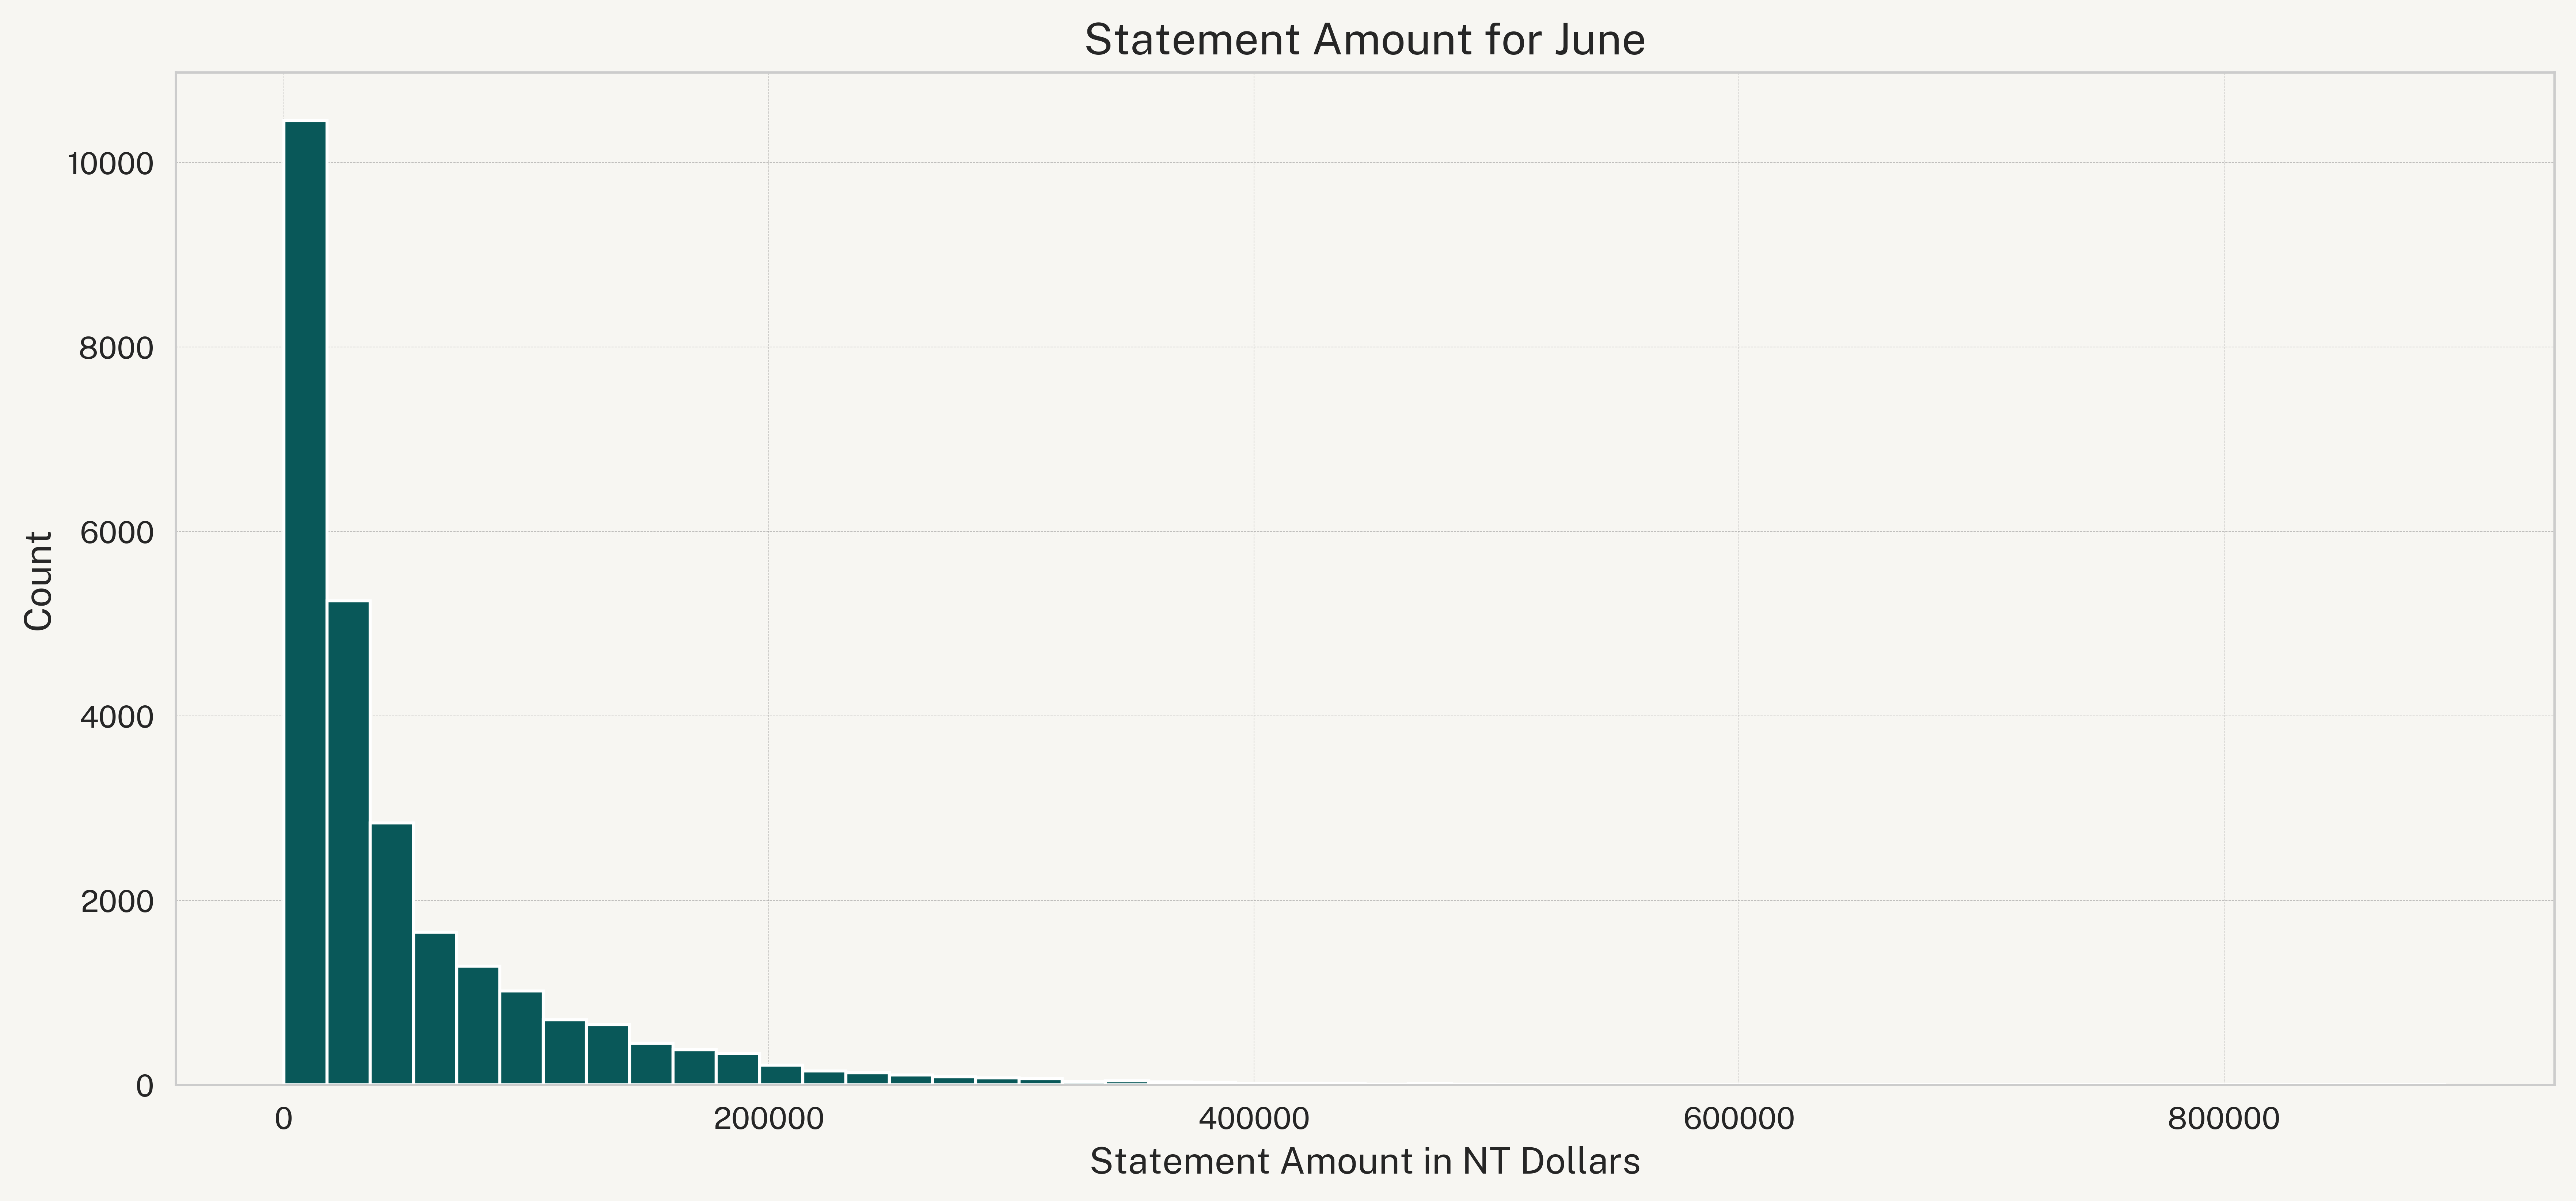

In [33]:
# df['X15'].hist(bins=10)
# plt.xlabel('X15')
# plt.ylabel('Freq')
# plt.title('Bill Amount 4 histogram')

ax = default_data.loc[default_data['BILL_AMT4'] > 0, 'BILL_AMT4'].hist(bins=50)
ax.set_xlabel("Statement Amount in NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for June")

plt.show()

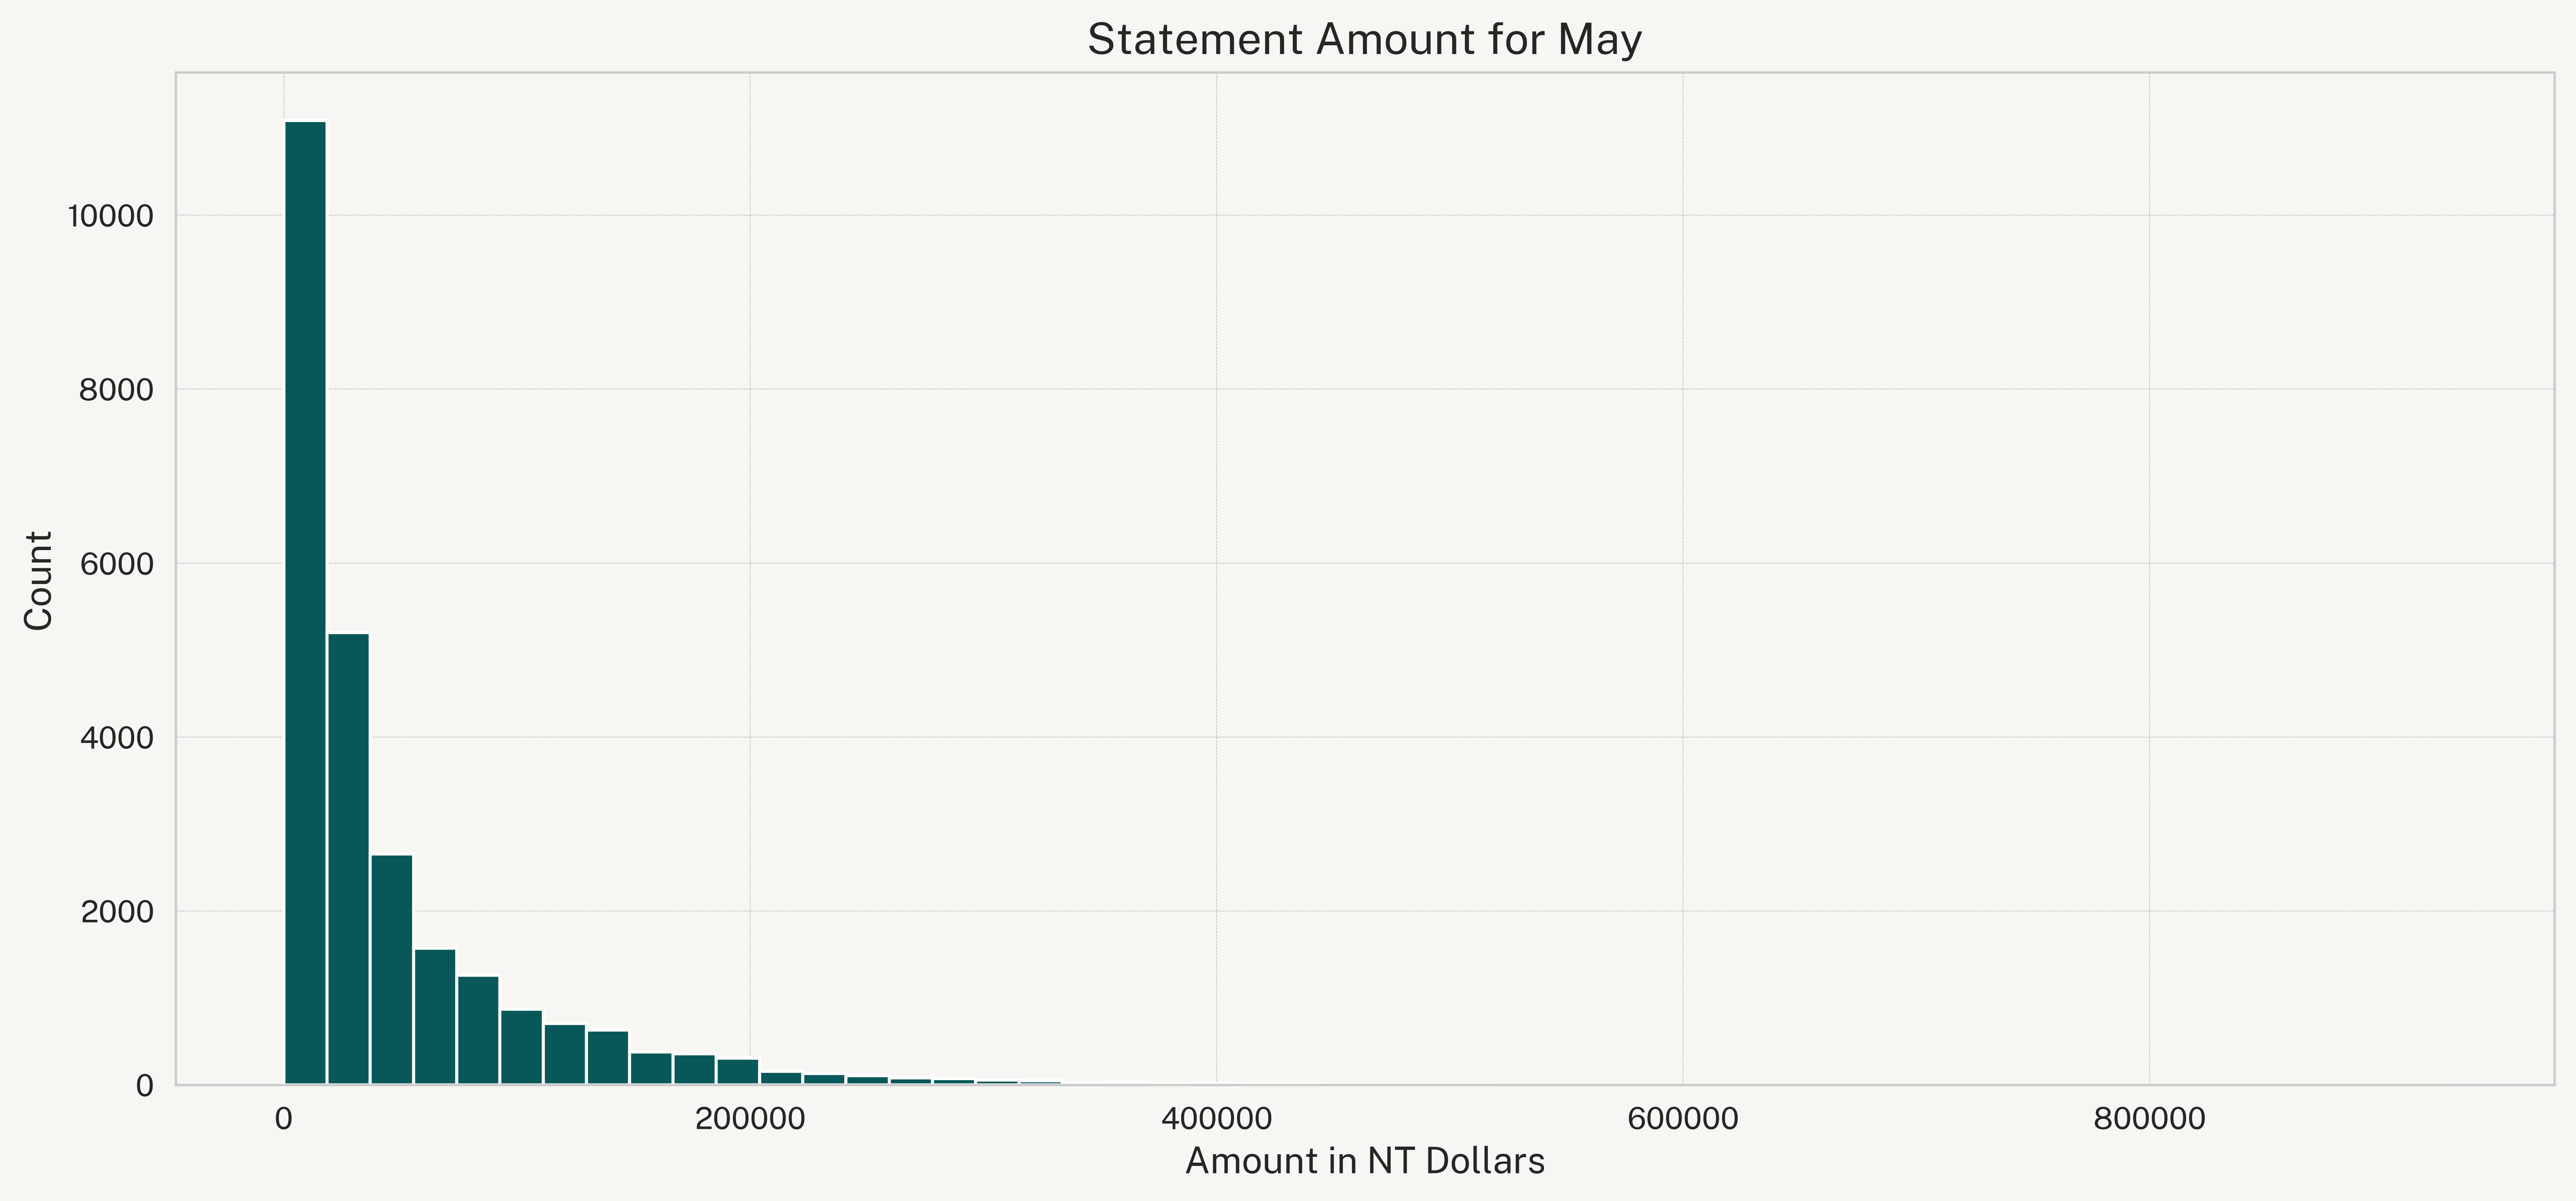

In [34]:
# df['X16'].hist(bins=10)
# plt.xlabel('X16')
# plt.ylabel('Freq')
# plt.title('Bill Amount 5 histogram')

ax = default_data.loc[default_data['BILL_AMT5'] > 0, 'BILL_AMT5'].hist(bins=50)
ax.set_xlabel("Amount in NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for May")

plt.show()

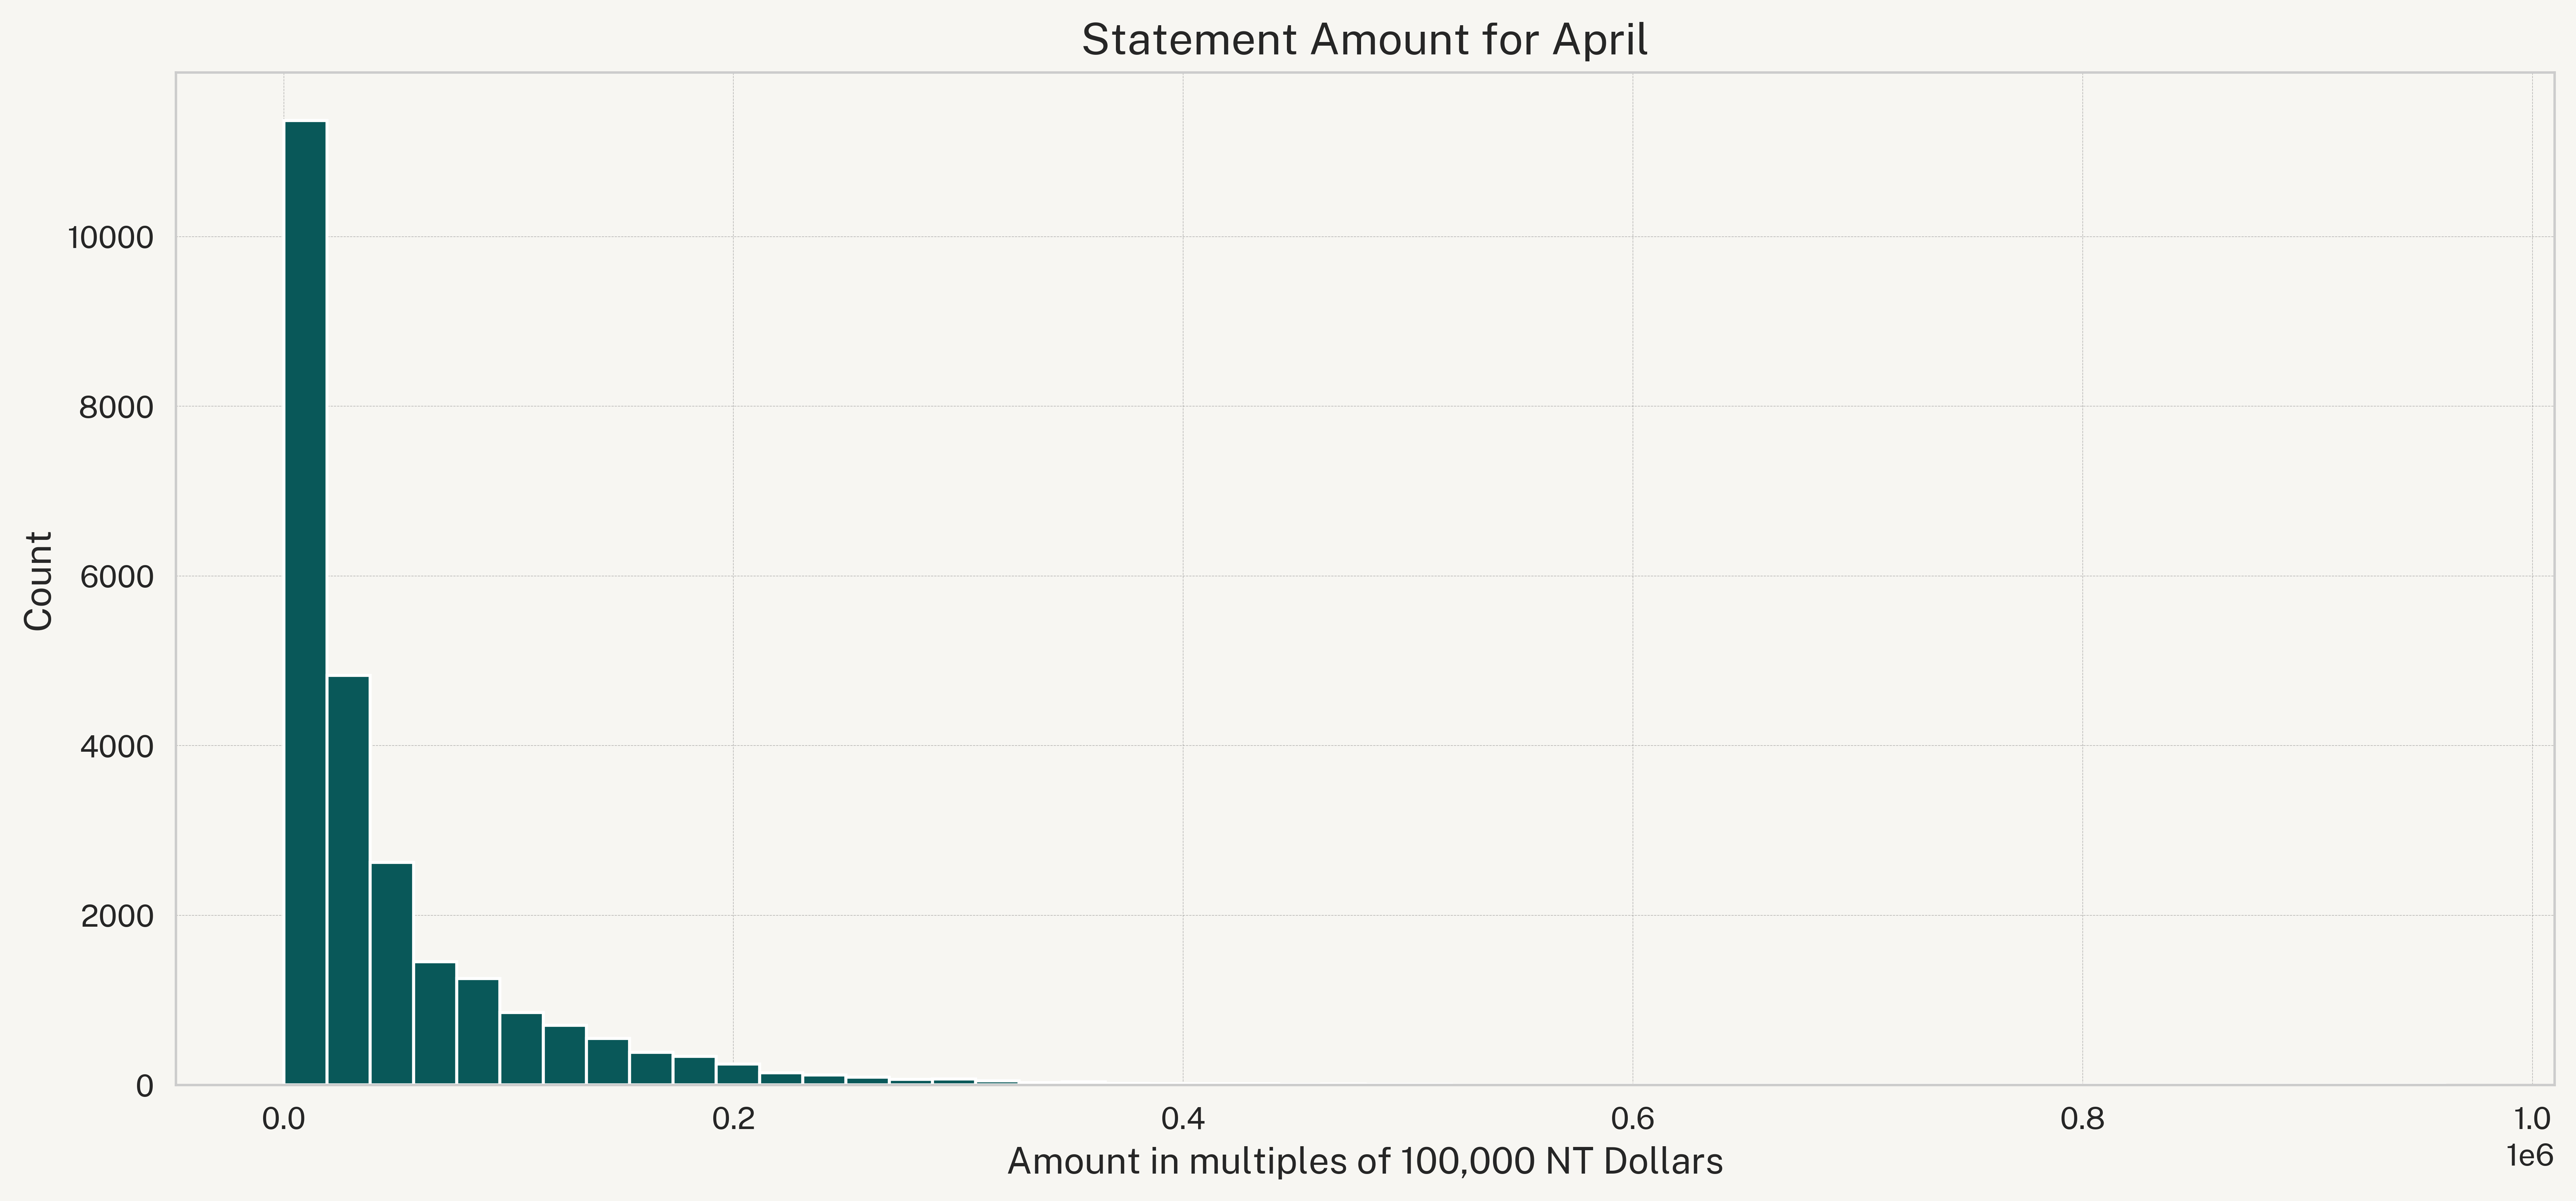

In [35]:
# df['X17'].hist(bins=10)
# plt.xlabel('X17')
# plt.ylabel('Freq')
# plt.title('Bill Amount 6 histogram')

ax = default_data.loc[default_data['BILL_AMT6'] > 0, 'BILL_AMT6'].hist(bins=50)
ax.set_xlabel("Amount in multiples of 100,000 NT Dollars")
ax.set_ylabel("Count")
ax.set_title("Statement Amount for April")

plt.show()

In [ ]:
df['X18'].hist(bins=10)
plt.xlabel('X18')
plt.ylabel('Freq')
plt.title('Pay Amount 1 histogram')

In [ ]:
df['X19'].hist(bins=10)
plt.xlabel('X19')
plt.ylabel('Freq')
plt.title('Pay Amount 2 histogram')

In [ ]:
df['X20'].hist(bins=10)
plt.xlabel('X20')
plt.ylabel('Freq')
plt.title('Pay Amount 3 histogram')

In [ ]:
df['X21'].hist(bins=10)
plt.xlabel('X21')
plt.ylabel('Freq')
plt.title('Pay Amount 4 histogram')

In [ ]:
df['X22'].hist(bins=10)
plt.xlabel('X22')
plt.ylabel('Freq')
plt.title('Pay Amount 5 histogram')

In [ ]:
df['X23'].hist(bins=10)
plt.xlabel('X23')
plt.ylabel('Freq')
plt.title('Pay Amount 6 histogram')

In [ ]:
df['Y'].hist(bins=10)
plt.xlabel('Y')
plt.ylabel('Freq')
plt.title('Default payment for next month histogram')
plt.show()

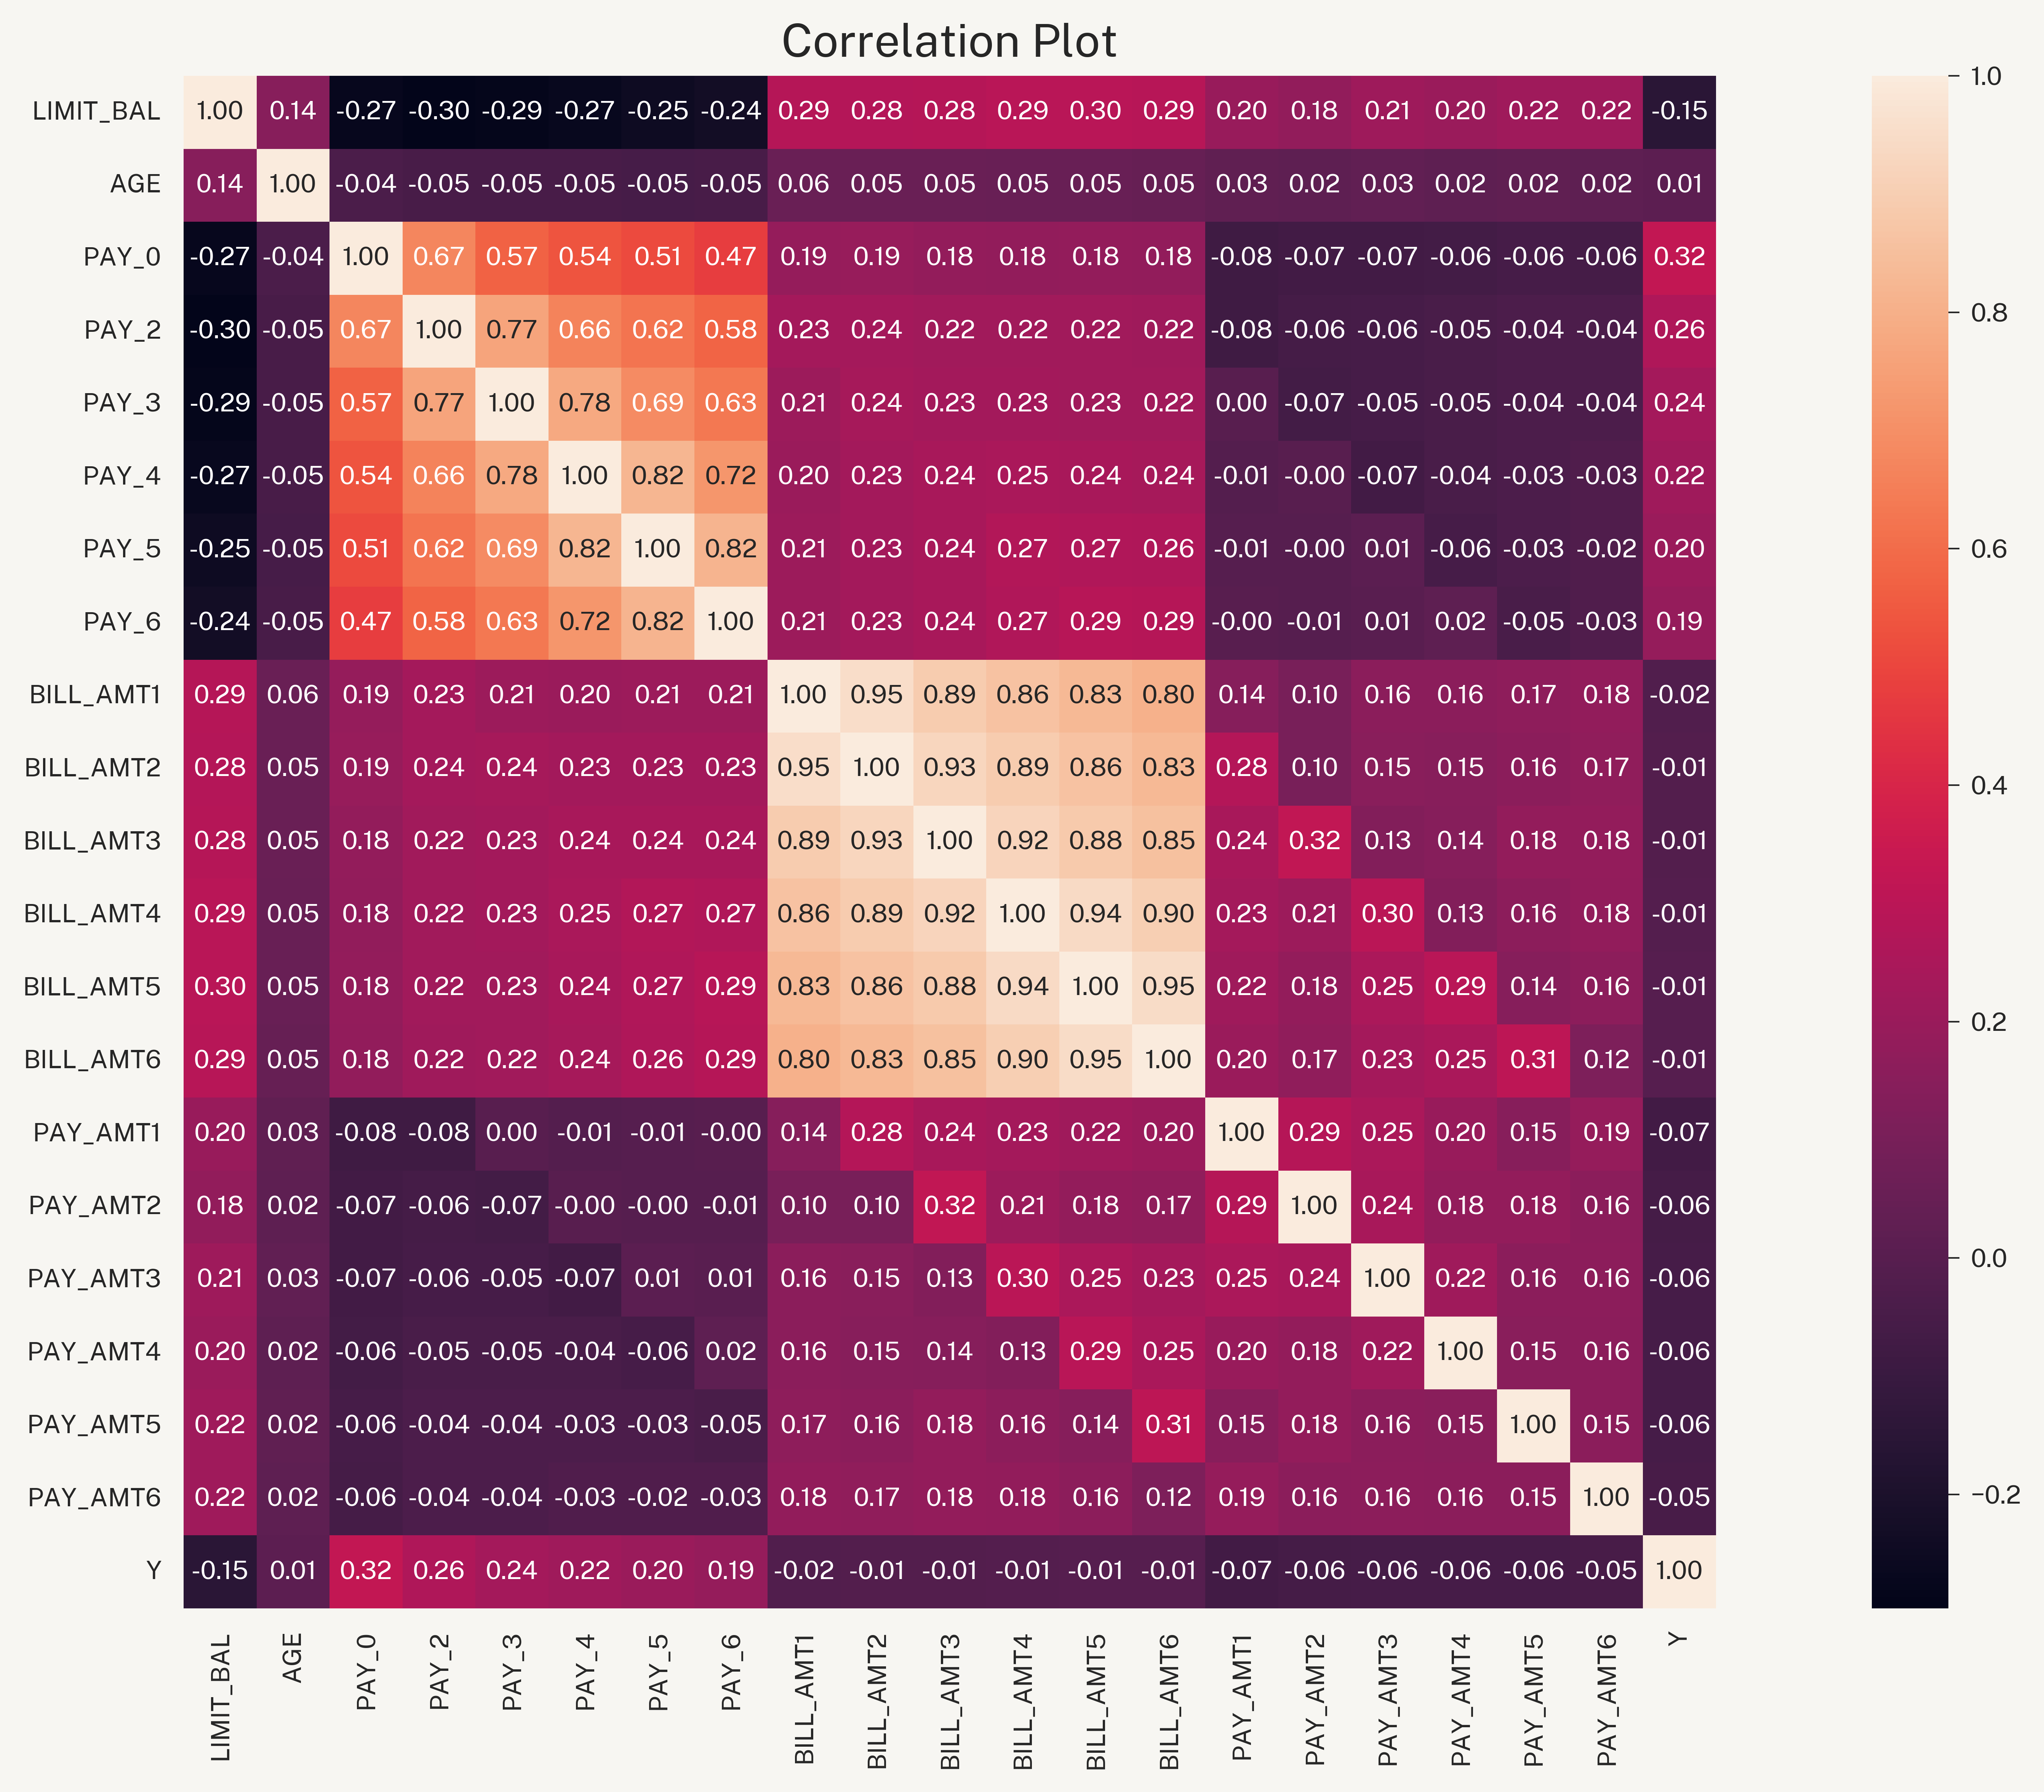

In [36]:
# Compute the correlation matrix
corr_matrix = default_data.drop(['MARRIAGE', 'EDUCATION', 'SEX'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(14, 8), dpi=600)  # Set the figure size
sns.heatmap(corr_matrix, 
            annot=True,       # Display correlation values
            cmap='rocket',  # Color map
            fmt=".2f",        # Format for the correlation values
            cbar=True,        # Add a color bar
            square=True,      # Make the cells square
            annot_kws={"size": 8})  # Adjust text size
plt.title('Correlation Plot')
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.yticks(fontsize=8)   # Keep y-axis labels horizontal
plt.xticks(fontsize=8)   # Set the size of the xtick labels
plt.tight_layout()       # Adjust layout to fit the plot nicely

# set cbar fontsize
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=8)

plt.show()

In [37]:
X = default_data.drop('Y', axis=1)
Y = default_data['Y']

#### Standardization

In [38]:
#Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X.drop(['SEX', "EDUCATION", "MARRIAGE"], axis=1))

In [39]:
scaled_data 

array([[-1.13672015, -1.24601985,  1.79456386, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 , -1.02904717, -0.87499115, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239, -0.16115646,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618,  0.16430256,  3.57426721, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636,  0.59824792,  0.90471219, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825,  1.14067961,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [40]:
scaled_cols = [X.drop(['SEX', "EDUCATION", "MARRIAGE"], axis=1).columns]

In [41]:
scaled_cols

[Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
        'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
       dtype='object')]

In [42]:
scaled_data_df = pd.DataFrame(scaled_data, columns=scaled_cols)

In [43]:
scaled_data_df.head()

LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0 -1.136720 -1.246020  1.794564  1.782348 -0.696663 -0.666599 -1.530046   
1 -0.365981 -1.029047 -0.874991  1.782348  0.138865  0.188746  0.234917   
2 -0.597202 -0.161156  0.014861  0.111736  0.138865  0.188746  0.234917   
3 -0.905498  0.164303  0.014861  0.111736  0.138865  0.188746  0.234917   
4 -0.905498  2.334029 -0.874991  0.111736 -0.696663  0.188746  0.234917   

      PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6  \
0 -1.486041 -0.642501 -0.647399 -0.667993 -0.672497 -0.663059 -0.652724   
1  1.992316 -0.659219 -0.666747 -0.639254 -0.621636 -0.606229 -0.597966   
2  0.253137 -0.298560 -0.493899 -0.482408 -0.449730 -0.417188 -0.391630   
3  0.253137 -0.057491 -0.013293  0.032846 -0.232373 -0.186729 -0.156579   
4  0.253137 -0.578618 -0.611318 -0.161189 -0.346997 -0.348137 -0.331482   

   PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
1 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
2 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
3 -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
4 -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187

#### Principal Component Analysis

In [44]:
#Apply PCA
pca = PCA(n_components=0.95)  # Specify the number of components you want
pca_data = pca.fit_transform(scaled_data)

#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.32691551 0.20310814 0.07543899 0.05014194 0.0461459  0.04440639
 0.04368688 0.03918403 0.03663652 0.03502348 0.02957272 0.02021896]


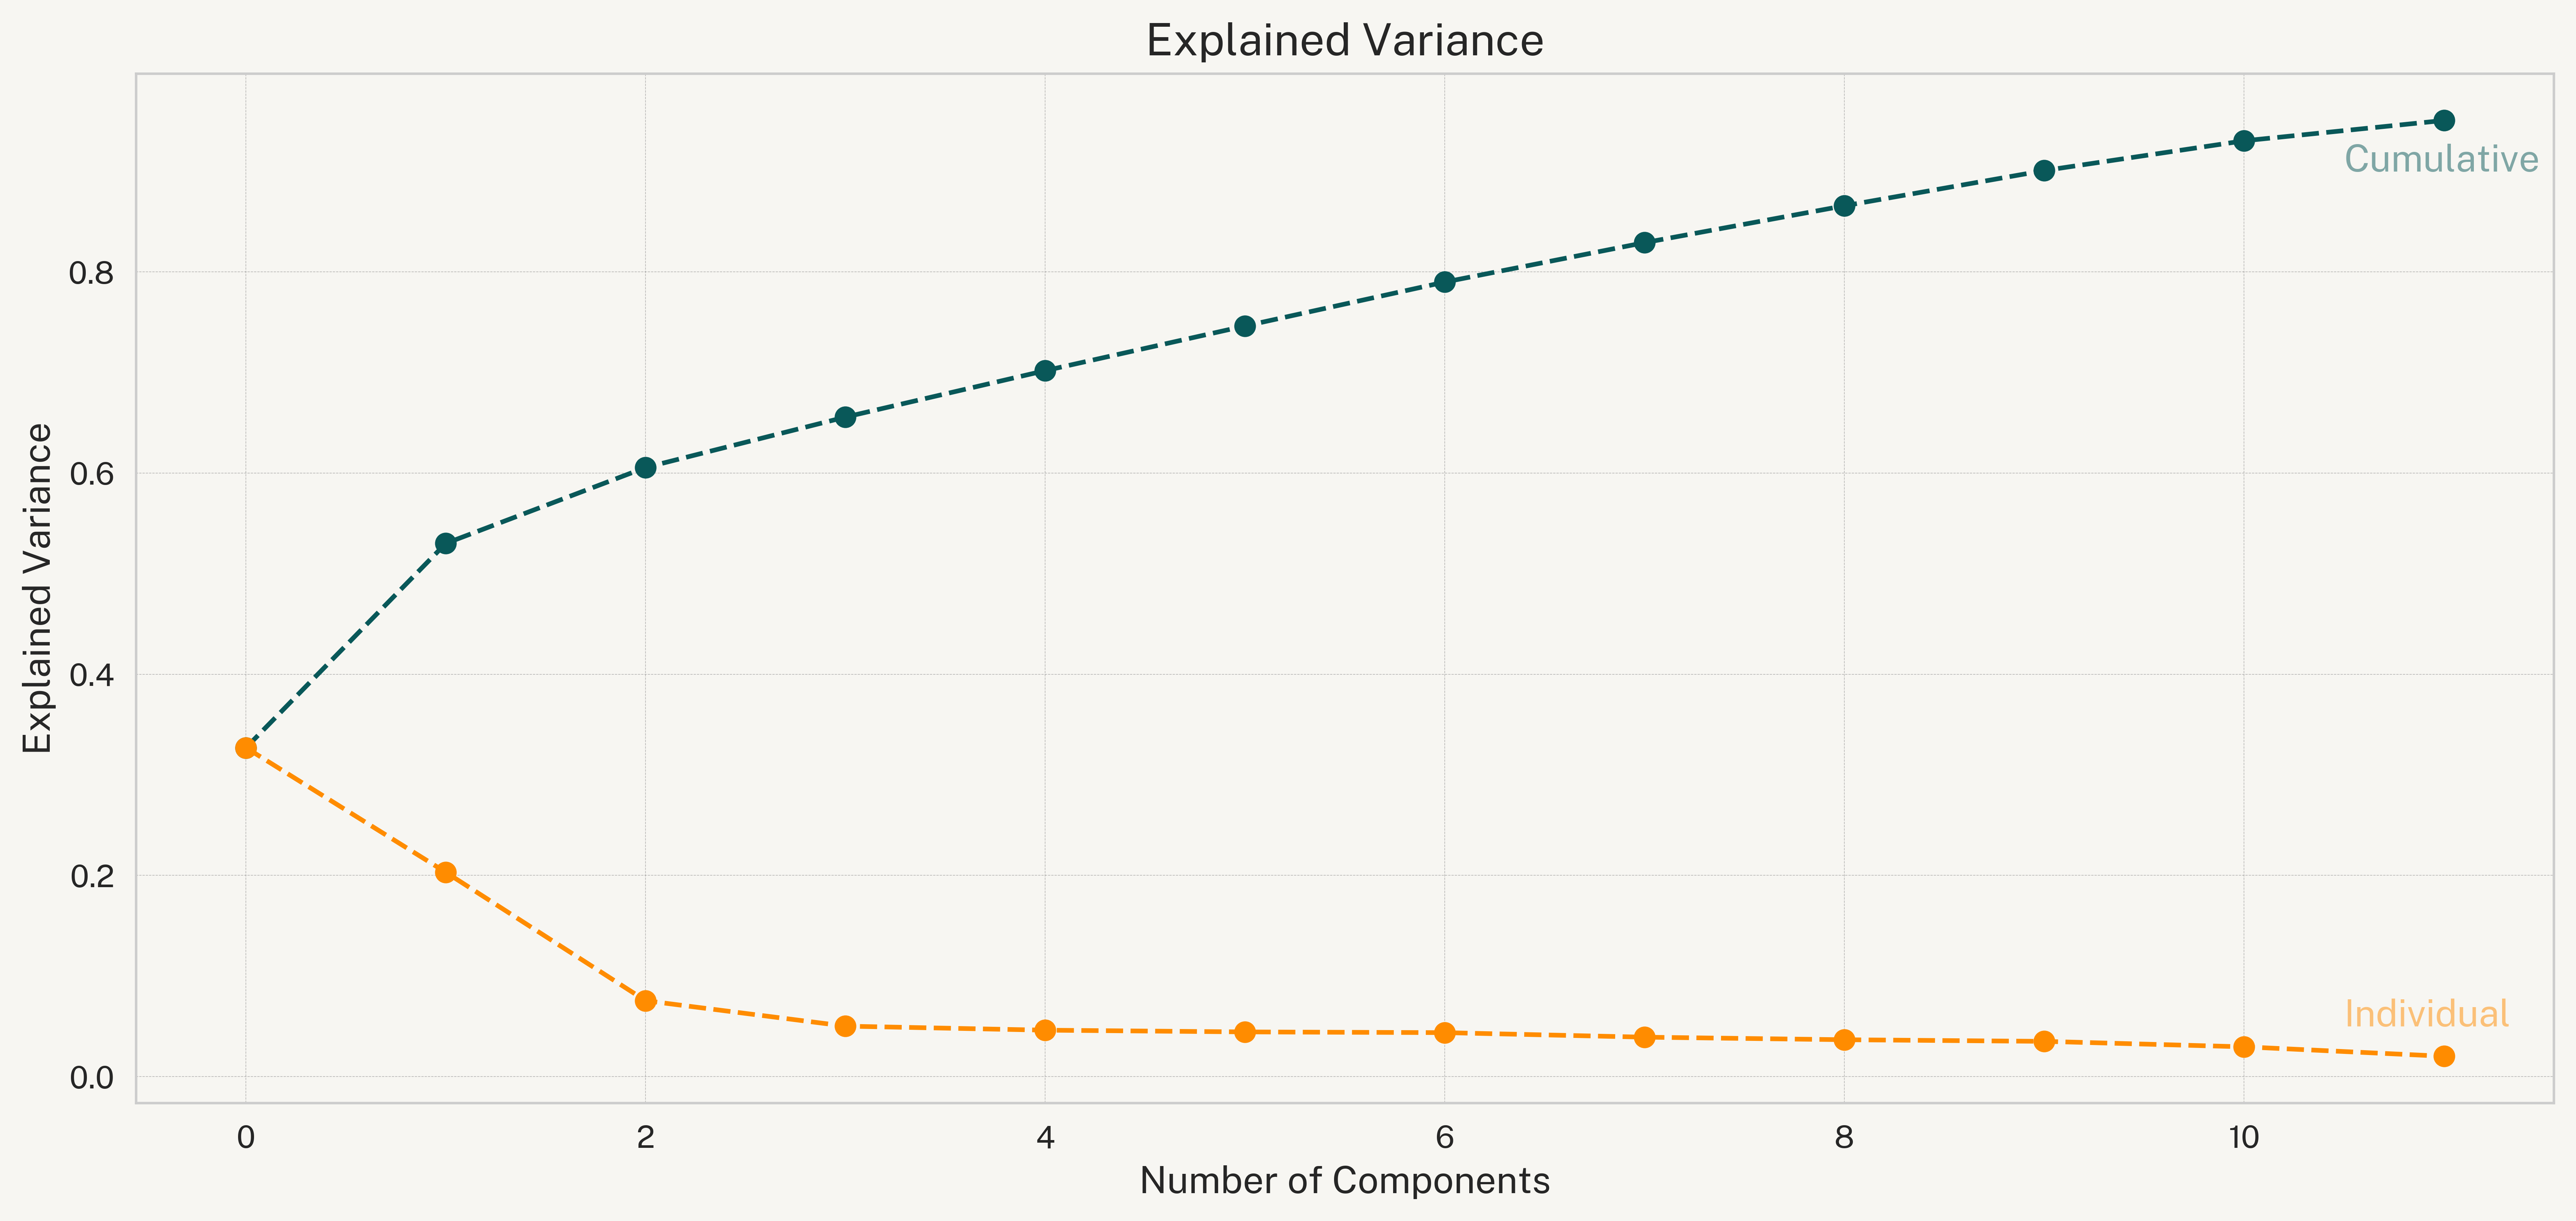

In [46]:
# scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--', color="darkorange")
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance')

# Add text saying individual and cumulative at ends of lines
plt.text(10.5, 0.9, 'Cumulative', alpha=0.5, color="#095859")
plt.text(10.5, 0.05, 'Individual', color='darkorange', alpha=0.5)

plt.show()

In [ ]:
#Plot the PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
#Plot Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

In [47]:
# Step 3: Extract PCA Loadings
loadings = pca.components_.T  # Transpose to align features with components
loadings_df = pd.DataFrame(loadings, index=scaled_cols)

# Display the PCA Loadings
print("PCA Loadings:")
print(loadings_df[0].sort_values(ascending=False))

PCA Loadings:
BILL_AMT4    0.354455
BILL_AMT5    0.352357
BILL_AMT3    0.350292
BILL_AMT2    0.346258
BILL_AMT6    0.345117
BILL_AMT1    0.334807
PAY_5        0.210204
PAY_4        0.206197
PAY_6        0.205778
PAY_3        0.199322
PAY_2        0.193185
PAY_0        0.160257
PAY_AMT1     0.094712
PAY_AMT3     0.086852
PAY_AMT2     0.079099
PAY_AMT4     0.078233
PAY_AMT5     0.075803
PAY_AMT6     0.070357
LIMIT_BAL    0.069794
AGE          0.012980
Name: 0, dtype: float64


In [48]:
pca_data.shape

(30000, 12)

From the above result, we possibly don't need to perform PCA on our data, since there is low correlation among our features, which leads to ineffective results from PCA.

## Modelling

In [49]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [60]:
columns_to_copy = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
        'PAY_AMT5', 'PAY_AMT6', 'AGE']
X[columns_to_copy] = scaled_data_df[columns_to_copy]

#### Train Test Split

In [61]:
# X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
#        'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
#        'X21', 'X22', 'X23']]
# Y = df[['Y']]

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=6304)



X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=6304, test_size=0.2)

### First Model: Linear SVM with "classic" solver.

In [63]:
# Initialize SVM with classic solver
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=6304)

# Fit the model
svc.fit(X_train, y_train)

LinearSVC(random_state=6304)

In [64]:
# Predict the labels
y_pred = svc.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.58%


### SVM with Stochastic Gradient Descent

In [65]:
X_train

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2  \
3126   -0.520128    2          2         2 -0.269643  1.794564  1.782348   
28330   1.021351    2          3         2 -0.378129  0.904712 -0.723570   
11474  -0.905498    2          2         1 -0.595102  0.014861  0.111736   
14607  -0.057685    2          2         1 -0.595102  0.014861  0.111736   
1598    0.558907    1          1         2 -0.595102 -0.874991 -0.723570   
...          ...  ...        ...       ...       ...       ...       ...   
22023   0.481833    2          2         2 -1.029047  0.014861  0.111736   
18219   0.481833    1          1         1  1.900084  0.904712 -1.558876   
28746  -0.365981    2          1         1 -0.378129 -0.874991 -0.723570   
25141   0.327685    1          2         1  4.286783  0.014861  0.111736   
12322  -0.365981    2          2         2 -1.137534  0.904712 -1.558876   

          PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
3126   0.138865  0.188746  0.234917  ...   0.392005   0.492774   0.597794   
28330  0.138865  0.188746 -1.530046  ...  -0.533729  -0.672497  -0.663059   
11474  0.138865  0.188746  0.234917  ...  -0.463734  -0.452932  -0.462783   
14607 -1.532192 -1.521944 -1.530046  ...  -0.677929  -0.672497  -0.663059   
1598  -0.696663  0.188746  0.234917  ...  -0.515935  -0.436005  -0.513263   
...         ...       ...       ...  ...        ...        ...        ...   
22023  0.138865  0.188746  0.234917  ...  -0.610876  -0.622227  -0.594403   
18219 -1.532192 -1.521944 -1.530046  ...  -0.677929  -0.672497  -0.663059   
28746 -0.696663 -0.666599 -0.647565  ...  -0.662283  -0.669497  -0.637580   
25141  0.138865  0.188746  0.234917  ...   2.204365   2.495082   2.723686   
12322 -0.696663 -0.666599 -0.647565  ...  -0.502553  -0.648357  -0.663059   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
3126    0.662539 -0.341942 -0.126784 -0.183208 -0.180397 -0.183229 -0.180878  
28330  -0.652724  4.009382 -0.168016 -0.296801 -0.308063 -0.314136 -0.226555  
11474  -0.420545 -0.222036 -0.211852 -0.240005 -0.244230 -0.117776 -0.237130  
14607  -0.652724 -0.341942 -0.256990 -0.296801 -0.308063 -0.314136 -0.293382  
1598   -0.558338  0.099102  0.231846  0.272188 -0.306722 -0.076082  0.100831  
...          ...       ...       ...       ...       ...       ...       ...  
22023  -0.567086 -0.277098 -0.211591 -0.236597 -0.244230 -0.248683 -0.012122  
18219  -0.652724 -0.341942 -0.256990 -0.296801 -0.308063 -0.314136 -0.293382  
28746  -0.626714 -0.341942 -0.209898 -0.285840 -0.209185 -0.314136 -0.249112  
25141   2.873640  0.243701  0.125381  0.214369  0.157918  0.176764  0.134133  
12322  -0.652724 -0.341942  0.270864 -0.208596 -0.308063 -0.314136 -0.293382  

[24000 rows x 23 columns]

In [67]:
# SVM with Adam solver
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=6304)

# Fit the model
sgd.fit(X_train, y_train)

# Predict the labels
y_pred = sgd.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy * 100, "\b%")

Accuracy: 81.25%


### Adam Optimizer using a simple feedforward Neural Network

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [70]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Add a dimension for BCELoss
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


In [71]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [74]:
# Define the neural network
class CreditCardNN(nn.Module):
    def __init__(self, input_dim):
        super(CreditCardNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = CreditCardNN(input_dim)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0095)

# Training loop
epochs = 40
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred >= 0.5).float()
    accuracy = accuracy_score(y_test_tensor, y_pred_class)
    print(f"Accuracy: {accuracy:.2f}")


Epoch 1/40, Loss: 0.4538
Epoch 2/40, Loss: 0.4414
Epoch 3/40, Loss: 0.4391
Epoch 4/40, Loss: 0.4351
Epoch 5/40, Loss: 0.4350
Epoch 6/40, Loss: 0.4333
Epoch 7/40, Loss: 0.4316
Epoch 8/40, Loss: 0.4312
Epoch 9/40, Loss: 0.4308
Epoch 10/40, Loss: 0.4287
Epoch 11/40, Loss: 0.4279
Epoch 12/40, Loss: 0.4277
Epoch 13/40, Loss: 0.4282
Epoch 14/40, Loss: 0.4253
Epoch 15/40, Loss: 0.4264
Epoch 16/40, Loss: 0.4244
Epoch 17/40, Loss: 0.4249
Epoch 18/40, Loss: 0.4250
Epoch 19/40, Loss: 0.4247
Epoch 20/40, Loss: 0.4237
Epoch 21/40, Loss: 0.4239
Epoch 22/40, Loss: 0.4237
Epoch 23/40, Loss: 0.4212
Epoch 24/40, Loss: 0.4221
Epoch 25/40, Loss: 0.4212
Epoch 26/40, Loss: 0.4207
Epoch 27/40, Loss: 0.4222
Epoch 28/40, Loss: 0.4193
Epoch 29/40, Loss: 0.4199
Epoch 30/40, Loss: 0.4182
Epoch 31/40, Loss: 0.4198
Epoch 32/40, Loss: 0.4189
Epoch 33/40, Loss: 0.4186
Epoch 34/40, Loss: 0.4185
Epoch 35/40, Loss: 0.4165
Epoch 36/40, Loss: 0.4170
Epoch 37/40, Loss: 0.4155
Epoch 38/40, Loss: 0.4165
Epoch 39/40, Loss: 0.

After experimenting with hyperparameters like the number of epochs, learning rate, etc., we observe that the accuracy of a simple feedforward neural network with the Adam Optimizer levels off at 82%, which is almost similar to SVM with SGD and LinearSVMs.